In [2]:
# Import libraries and modules
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print(np.__version__)
print(tf.__version__)
np.set_printoptions(threshold=np.inf)

1.18.1
1.15.2-dlenv_tfe


# Local Development

## Arguments

In [4]:
arguments = {}
# File arguments.
arguments["train_file_pattern"] = "gs://machine-learning-1234-bucket/gan/data/image_translation_unpaired/google_maps/train*.tfrecord"
arguments["eval_file_pattern"] = "gs://machine-learning-1234-bucket/gan/data/image_translation_unpaired/google_maps/val*.tfrecord"
arguments["output_dir"] = "gs://machine-learning-1234-bucket/gan/cyclegan/trained_model"

# Training parameters.
arguments["train_batch_size"] = 1
arguments["train_steps"] = 200 * 1096
arguments["save_summary_steps"] = 100
arguments["save_checkpoints_steps"] = 5000
arguments["keep_checkpoint_max"] = 10
arguments["input_fn_autotune"] = False
arguments["image_pool_capacity"] = 50
arguments["use_least_squares_loss"] = True

# Eval parameters.
arguments["eval_batch_size"] = 1
arguments["eval_steps"] = 10
arguments["start_delay_secs"] = 6000
arguments["throttle_secs"] = 6000

# Image parameters.
arguments["height"] = 256
arguments["width"] = 256
arguments["depth"] = 3
arguments["preprocess_image_resize_jitter_size"] = [286, 286]
arguments["preprocess_image_use_random_mirroring"] = True

# Generator parameters.
arguments["generator_use_unet"] = False
arguments["generator_l1_regularization_scale"] = 0.
arguments["generator_l2_regularization_scale"] = 0.
arguments["generator_optimizer"] = "Adam"
arguments["generator_learning_rate"] = 0.0002
arguments["generator_learning_rate_decay_type"] = "piecewise_polynomial"
arguments["generator_learning_rate_constant_steps"] = 100 * 1096
arguments["generator_learning_rate_decay_steps"] = 100 * 1096
arguments["generator_learning_rate_end_learning_rate"] = 0.0
arguments["generator_learning_rate_power"] = 1.0
arguments["generator_learning_rate_cycle"] = False
arguments["generator_learning_rate_decay_rate"] = 0.99
arguments["generator_learning_rate_staircase"] = False
arguments["generator_learning_rate_alpha"] = 0.0
arguments["generator_adam_beta1"] = 0.5
arguments["generator_adam_beta2"] = 0.999
arguments["generator_adam_epsilon"] = 1e-8
arguments["generator_clip_gradients"] = None
arguments["generator_train_steps"] = 1
arguments["forward_cycle_loss_lambda"] = 10.0
arguments["backward_cycle_loss_lambda"] = 10.0
arguments["identity_loss_lambda"] = 0.5

# Generator U-net encoder parameters.
arguments["generator_unet_encoder_num_filters"] = [64, 128, 256, 512, 512, 512, 512, 512]
arguments["generator_unet_encoder_kernel_sizes"] = [4] * len(
    arguments["generator_unet_encoder_num_filters"]
)
arguments["generator_unet_encoder_strides"] = [2] * len(
    arguments["generator_unet_encoder_num_filters"]
)
arguments["generator_unet_encoder_downsample"] = [True] * len(
    arguments["generator_unet_encoder_num_filters"]
)
arguments["generator_unet_encoder_pad_type"] = "constant"
arguments["generator_unet_encoder_pad_constant"] = 0.0
arguments["generator_unet_encoder_layer_norm_before_act"] = True
arguments["generator_unet_encoder_dropout_before_act"] = False
arguments["generator_unet_encoder_dropout_before_norm"] = False
arguments["generator_unet_encoder_layer_norm_type"] = [None] + ["instance"] * (
    len(arguments["generator_unet_encoder_num_filters"]) - 2
) + ["None"]
arguments["generator_unet_encoder_dropout_rates"] = [0.] * len(
    arguments["generator_unet_encoder_num_filters"]
)
arguments["generator_unet_encoder_activation"] = ["leaky_relu"] * (
    len(arguments["generator_unet_encoder_num_filters"]) - 1
) + ["relu"]
arguments["generator_unet_encoder_leaky_relu_alpha"] = 0.2

# Generator U-net decoder parameters.
arguments["generator_unet_decoder_num_filters"] = [512, 512, 512, 512, 256, 128, 64, arguments["depth"]]
arguments["generator_unet_decoder_kernel_sizes"] = [4] * len(
    arguments["generator_unet_decoder_num_filters"]
)
arguments["generator_unet_decoder_strides"] = [2] * len(
    arguments["generator_unet_decoder_num_filters"]
)
arguments["generator_unet_decoder_downsample"] = [False] * (
    len(arguments["generator_unet_decoder_num_filters"]) - 1
) + [True]
arguments["generator_unet_decoder_pad_type"] = "constant"
arguments["generator_unet_decoder_pad_constant"] = 0.0
arguments["generator_unet_decoder_layer_norm_before_act"] = True
arguments["generator_unet_decoder_dropout_before_act"] = False
arguments["generator_unet_decoder_dropout_before_norm"] = False
arguments["generator_unet_decoder_layer_norm_type"] = ["instance"] * (
    len(arguments["generator_unet_decoder_num_filters"]) - 1
) + ["None"]
arguments["generator_unet_decoder_dropout_rates"] = [0.5] * 3 + [0.] * 5
arguments["generator_unet_decoder_activation"] = ["relu"]* (
    len(arguments["generator_unet_decoder_num_filters"]) - 1
) + ["tanh"]
arguments["generator_unet_decoder_leaky_relu_alpha"] = 0.2

# Generator resnet encoder parameters.
arguments["generator_resnet_enc_num_filters"] = [64, 128, 256]
arguments["generator_resnet_enc_kernel_sizes"] = [7, 3, 3]
arguments["generator_resnet_enc_strides"] = [1, 2, 2]
arguments["generator_resnet_enc_downsample"] = [True] * len(
    arguments["generator_resnet_enc_num_filters"]
)
arguments["generator_resnet_enc_pad_type"] = "reflection"
arguments["generator_resnet_enc_pad_constant"] = 0.0
arguments["generator_resnet_enc_layer_norm_before_act"] = True
arguments["generator_resnet_enc_dropout_before_act"] = False
arguments["generator_resnet_enc_dropout_before_norm"] = False
arguments["generator_resnet_enc_layer_norm_type"] = ["instance"] * len(
    arguments["generator_resnet_enc_num_filters"]
)
arguments["generator_resnet_enc_dropout_rates"] = [0.] * len(
    arguments["generator_resnet_enc_num_filters"]
)
arguments["generator_resnet_enc_activation"] = ["relu"] * len(
    arguments["generator_resnet_enc_num_filters"]
)
arguments["generator_resnet_enc_leaky_relu_alpha"] = 0.2

# Generator resnet res block parameters.
arguments["generator_num_resnet_blocks"] = 9
arguments["generator_resnet_res_num_filters"] = [256, 256]
arguments["generator_resnet_res_kernel_sizes"] = [3, 3]
arguments["generator_resnet_res_strides"] = [1, 1]
arguments["generator_resnet_res_downsample"] = [True] * len(
    arguments["generator_resnet_res_num_filters"]
)
arguments["generator_resnet_res_pad_type"] = "reflection"
arguments["generator_resnet_res_pad_constant"] = 0.0
arguments["generator_resnet_res_layer_norm_before_act"] = True
arguments["generator_resnet_res_dropout_before_act"] = False
arguments["generator_resnet_res_dropout_before_norm"] = False
arguments["generator_resnet_res_layer_norm_type"] = ["instance", "instance"]
arguments["generator_resnet_res_dropout_rates"] = [0., 0.]
arguments["generator_resnet_res_activation"] = ["relu", "None"]
arguments["generator_resnet_res_leaky_relu_alpha"] = 0.2

# Generator resnet decoder parameters.
arguments["generator_resnet_dec_num_filters"] = [128, 64, arguments["depth"]]
arguments["generator_resnet_dec_kernel_sizes"] = [3, 3, 7]
arguments["generator_resnet_dec_strides"] = [2, 2, 1]
arguments["generator_resnet_dec_downsample"] = [False] * (
    len(arguments["generator_resnet_dec_num_filters"]) - 1
) + [True]
arguments["generator_resnet_dec_pad_type"] = "reflection"
arguments["generator_resnet_dec_pad_constant"] = 0.0
arguments["generator_resnet_dec_layer_norm_before_act"] = True
arguments["generator_resnet_dec_dropout_before_act"] = False
arguments["generator_resnet_dec_dropout_before_norm"] = False
arguments["generator_resnet_dec_layer_norm_type"] = ["instance"] * len(
    arguments["generator_resnet_dec_num_filters"]
)
arguments["generator_resnet_dec_dropout_rates"] = [0.] * len(
    arguments["generator_resnet_dec_num_filters"]
)
arguments["generator_resnet_dec_activation"] = ["relu"] * (
    len(arguments["generator_resnet_dec_num_filters"]) - 1
) + ["tanh"]
arguments["generator_resnet_dec_leaky_relu_alpha"] = 0.2

# Discriminator hyperparameters.
arguments["discriminator_num_filters"] = [64, 128, 256, 512, 512, 1]
arguments["discriminator_kernel_sizes"] = [4] * len(
    arguments["discriminator_num_filters"]
)
arguments["discriminator_strides"] = [2] * (
    len(arguments["discriminator_num_filters"]) - 2
) + [1] * 2
arguments["discriminator_downsample"] = [True] * len(
    arguments["discriminator_num_filters"]
)
arguments["discriminator_pad_type"] = "reflection"
arguments["discriminator_pad_constant"] = 0.0
arguments["discriminator_layer_norm_before_act"] = True
arguments["discriminator_dropout_before_act"] = False
arguments["discriminator_dropout_before_norm"] = False
arguments["discriminator_layer_norm_type"] = ["None"] + ["instance"] * (
    len(arguments["discriminator_num_filters"]) - 2
) + ["None"]
arguments["discriminator_dropout_rates"] = [0.] * len(
    arguments["discriminator_num_filters"]
)
arguments["discriminator_activation"] = ["leaky_relu"] * (
    len(arguments["discriminator_num_filters"]) - 1
) + ["None"]
arguments["discriminator_leaky_relu_alpha"] = 0.2
arguments["discriminator_l1_regularization_scale"] = 0.
arguments["discriminator_l2_regularization_scale"] = 0.
arguments["discriminator_optimizer"] = "Adam"
arguments["discriminator_learning_rate"] = 0.0002
arguments["discriminator_learning_rate_decay_type"] = "piecewise_polynomial"
arguments["discriminator_learning_rate_constant_steps"] = 100 * 1096
arguments["discriminator_learning_rate_decay_steps"] = 100 * 1096
arguments["discriminator_learning_rate_end_learning_rate"] = 0.0
arguments["discriminator_learning_rate_power"] = 1.0
arguments["discriminator_learning_rate_cycle"] = False
arguments["discriminator_learning_rate_decay_rate"] = 0.99
arguments["discriminator_learning_rate_staircase"] = False
arguments["discriminator_learning_rate_alpha"] = 0.0
arguments["discriminator_adam_beta1"] = 0.5
arguments["discriminator_adam_beta2"] = 0.999
arguments["discriminator_adam_epsilon"] = 1e-8
arguments["discriminator_clip_gradients"] = None
arguments["discriminator_train_steps"] = 1


## print_object.py

In [5]:
def print_obj(function_name, object_name, object_value):
    """Prints enclosing function, object name, and object value.

    Args:
        function_name: str, name of function.
        object_name: str, name of object.
        object_value: object, value of passed object.
    """
#     pass
    print("{}: {} = {}".format(function_name, object_name, object_value))


## image_utils.py

In [6]:
def decode_image(image_bytes, params):
    """Decodes image bytes tensor.

    Args:
        image_bytes: tensor, image bytes with shape [?,].
        params: dict, user passed parameters.

    Returns:
        Decoded image tensor of shape [height, width, depth].
    """
    func_name = "decode_image"
    print_obj("\n" + func_name, "image_bytes", image_bytes)

    # Convert from a scalar string tensor (whose single string has
    # length height * width * depth) to a uint8 tensor with shape
    # [height * width * depth].
    image = tf.decode_raw(
        input_bytes=image_bytes,
        out_type=tf.uint8,
        name="image_decoded"
    )
    print_obj(func_name, "image", image)

    # Reshape flattened image back into normal dimensions.
    image = tf.reshape(
        tensor=image,
        shape=[params["height"], params["width"], params["depth"]],
        name="image_reshaped"
    )
    print_obj(func_name, "image", image)

    return image


def preprocess_image(image, mode, params):
    """Preprocess image tensor.

    Args:
        image: tensor, input image with shape
            [cur_batch_size, height, width, depth].
        mode: tf.estimator.ModeKeys with values of either TRAIN, EVAL, or
            PREDICT.
        params: dict, user passed parameters.

    Returns:
        Preprocessed image tensor with shape
            [cur_batch_size, height, width, depth].
    """
    func_name = "preprocess_image"
    print_obj("\n" + func_name, "image", image)

    if mode == tf.estimator.ModeKeys.TRAIN:
        # Add some random jitter.
        if params["preprocess_image_resize_jitter_size"]:
            image = tf.image.resize(
                images=image,
                size=params["preprocess_image_resize_jitter_size"],
                method="bilinear",
                name="{}_jitter_resize".format(func_name)
            )
            print_obj(func_name, "image", image)

            image = tf.image.random_crop(
                value=image,
                size=[params["height"], params["width"], params["depth"]],
                name="{}_jitter_crop".format(func_name)
            )
            print_obj(func_name, "image", image)

        # Random mirroring.
        if params["preprocess_image_use_random_mirroring"]:
            image = tf.image.random_flip_left_right(image=image)
            print_obj(func_name, "image", image)

    # Convert from [0, 255] -> [-1.0, 1.0] floats.
    image = tf.subtract(
        x=tf.cast(x=image, dtype=tf.float32) * (2. / 255),
        y=1.0,
        name="{}_scaled".format(func_name)
    )
    print_obj(func_name, "image", image)

    return image


def handle_input_image(image_bytes, mode, params):
    """Handles image tensor transformations.

    Args:
        image_bytes: tensor, image bytes with shape [?,].
        mode: tf.estimator.ModeKeys with values of either TRAIN or EVAL.
        params: dict, user passed parameters.

    Returns:
        Preprocessed image tensor with shape
            [cur_batch_size, height, width, depth].
    """
    func_name = "handle_input_image"
    print_obj("\n" + func_name, "image_bytes", image_bytes)

    # Decode image.
    image = decode_image(image_bytes=image_bytes, params=params)
    print_obj(func_name, "image", image)

    # Preprocess image.
    image = preprocess_image(image=image, mode=mode, params=params)
    print_obj(func_name, "image", image)

    return image


def resize_fake_images(fake_images, params):
    """Resizes fake images to match real image sizes.

    Args:
        fake_images: tensor, fake images from generator.
        params: dict, user passed parameters.

    Returns:
        Resized image tensor.
    """
    func_name = "resize_fake_images"
    print_obj("\n" + func_name, "fake_images", fake_images)

    # Resize fake images to match real image sizes.
    resized_fake_images = tf.image.resize(
        images=fake_images,
        size=[params["height"], params["width"]],
        method="nearest",
        name="resized_fake_images"
    )
    print_obj(func_name, "resized_fake_images", resized_fake_images)

    return resized_fake_images


## input.py

In [7]:
def decode_example(protos, mode, params):
    """Decodes TFRecord file into tensors.

    Given protobufs, decode into image and label tensors.

    Args:
        protos: protobufs from TFRecord file.
        mode: tf.estimator.ModeKeys with values of either TRAIN or EVAL.
        params: dict, user passed parameters.

    Returns:
        Image tensors from domain a and 2.
    """
    func_name = "decode_example"

    # Create feature schema map for protos.
    feature_schema = {
        "domain_a_image_raw": tf.FixedLenFeature(shape=[], dtype=tf.string),
        "domain_b_image_raw": tf.FixedLenFeature(shape=[], dtype=tf.string)
    }

    # Parse features from tf.Example.
    parsed_features = tf.parse_single_example(
        serialized=protos, features=feature_schema
    )
    print_obj("\n" + func_name, "parsed_features", parsed_features)

    # Decode source image.
    domain_a_image = handle_input_image(
        image_bytes=parsed_features["domain_a_image_raw"],
        mode=mode,
        params=params
    )
    print_obj(func_name, "domain_a_image", domain_a_image)

    # Decode target image.
    domain_b_image = handle_input_image(
        image_bytes=parsed_features["domain_b_image_raw"],
        mode=mode,
        params=params
    )
    print_obj(func_name, "domain_b_image", domain_b_image)

    return {"domain_a_image": domain_a_image, "domain_b_image": domain_b_image}


def set_static_shape(features, batch_size, params):
    """Sets static shape of batched input tensors in dataset.
    Args:
        features: dict, keys are feature names and values are feature tensors.
        batch_size: int, number of examples per batch.
        params:
    Returns:
        Features tensor dictionary and labels tensor.
    """
    features["domain_a_image"].set_shape(
        features["domain_a_image"].get_shape().merge_with(
            tf.TensorShape(dims=[batch_size, None, None, None])
        )
    )

    features["domain_b_image"].set_shape(
        features["domain_b_image"].get_shape().merge_with(
            tf.TensorShape(dims=[batch_size, None, None, None])
        )
    )
    return features


def read_dataset(filename, mode, batch_size, params):
    """Read data using tf.data, doing necessary preprocessing.

    Given filename, mode, batch size, and other parameters, read dataset
    using Dataset API, apply necessary preprocessing, and return an input
    function to the Estimator API.

    Args:
        filename: str, file pattern to read into our tf.data dataset.
        mode: The estimator ModeKeys. Can be TRAIN or EVAL.
        batch_size: int, number of examples per batch.
        params: dict, dictionary of user passed parameters.

    Returns:
        An input function.
    """
    def _input_fn():
        """Wrapper input function used by Estimator API to get data tensors.

        Returns:
            Batched dataset object of dictionary of feature tensors and label
                tensor.
        """
        # Create list of files that match pattern.
        file_list = tf.gfile.Glob(filename=filename)

        # Create dataset from file list.
        if params["input_fn_autotune"]:
            dataset = tf.data.TFRecordDataset(
                filenames=file_list,
                num_parallel_reads=tf.contrib.data.AUTOTUNE
            )
        else:
            dataset = tf.data.TFRecordDataset(filenames=file_list)

        # Shuffle and repeat if training with fused op.
        if mode == tf.estimator.ModeKeys.TRAIN:
            dataset = dataset.apply(
                tf.contrib.data.shuffle_and_repeat(
                    buffer_size=50 * batch_size,
                    count=None  # indefinitely
                )
            )

        # Decode file into a features dictionary of tensors, then batch.
        if params["input_fn_autotune"]:
            dataset = dataset.apply(
                tf.contrib.data.map_and_batch(
                    map_func=lambda x: decode_example(
                        protos=x,
                        mode=mode,
                        params=params
                    ),
                    batch_size=batch_size,
                    num_parallel_calls=tf.contrib.data.AUTOTUNE
                )
            )
        else:
            dataset = dataset.apply(
                tf.contrib.data.map_and_batch(
                    map_func=lambda x: decode_example(
                        protos=x,
                        mode=mode,
                        params=params
                    ),
                    batch_size=batch_size,
                    drop_remainder=True
                )
            )

        # Assign static shape, namely make the batch size axis static.
        dataset = dataset.map(
            map_func=lambda x: set_static_shape(
                features=x, batch_size=batch_size, params=params
            )
        )
        # Prefetch data to improve latency.
        if params["input_fn_autotune"]:
            dataset = dataset.prefetch(buffer_size=tf.contrib.data.AUTOTUNE)
        else:
            dataset = dataset.prefetch(buffer_size=1)

        # Create a iterator, then get batch of features from example queue.
        batched_dataset = dataset.make_one_shot_iterator().get_next()

        return batched_dataset
    return _input_fn


## padding.py

In [6]:
import math


class CustomPadding2D(tf.layers.Layer):
    """Custom layer for 2D padding.

    Fields:
        paddings: tensor, rank 2 tensor that stores paddings.
    """
    def __init__(self, conv_inputs, kernel_size, strides, padding, **kwargs):
        """Instantiates custom 2D padding layer.

        Args:
            conv_inputs: tensor, inputs to previous conv layer.
            kernel_size: int, list, or tuple, if int then the kernel size for
                both height and width.
            strides: int, list, or tuple, if int then the stride for both
                height and width.
            padding: str, either same or valid padding.
        """
        # Get kernel sizes.
        if isinstance(kernel_size, (list, tuple)):
            kernel_size = kernel_size
        elif isinstance(kernel_size, int):
            kernel_size = (kernel_size, kernel_size)

        # Get strides.
        if isinstance(strides, (list, tuple)):
            strides = strides
        elif isinstance(strides, int):
            strides = (strides, strides)

        # Get padding type.
        padding = padding.lower()
        assert padding in {"valid", "same"}

        # Create paddings.
        self.paddings = self._create_paddings(
            conv_inputs, kernel_size, strides, padding
        )

        # Pass anything else to base `Layer` class.
        super().__init__(**kwargs)

    def _create_paddings(self, conv_inputs, kernel_size, strides, padding):
        """Creates rank 2 paddings tensor.

        Args:
            conv_inputs: tensor, inputs to previous conv layer.
            kernel_size: int, list, or tuple, if int then the kernel size for
                both height and width.
            strides: int, list, or tuple, if int then the stride for both
                height and width.
            padding: str, either same or valid padding.
        """
        # Get input shape.
        input_shape = [x.value for x in conv_inputs.shape]
        print_obj("calculate_padding", "input_shape", input_shape)
        input_h, input_w = input_shape[1:3]

        # Expand kernel size into height and width.
        kernel_h, kernel_w = kernel_size

        # Expand strides into height and width.
        stride_h, stride_w = strides

        # Only pad if padding is same, otherwise don't if padding is valid.
        if padding == "same":
            # Calculate output shape.
            output_h = int(math.ceil(float(input_h) / float(stride_h)))
            output_w = int(math.ceil(float(input_w) / float(stride_w)))

            # Find out how much is missing in each dimension.
            pad_along_height = max(
                (output_h - 1) * stride_h + kernel_h - input_h, 0
            )
            pad_along_width = max(
                (output_w - 1) * stride_w + kernel_w - input_w, 0
            )

            # Preference to add any extra to bottom and right.
            pad_top = pad_along_height // 2
            pad_bottom = pad_along_height - pad_top
            pad_left = pad_along_width // 2
            pad_right = pad_along_width - pad_left
        elif padding == "valid":
            pad_top = 0
            pad_bottom = 0
            pad_left = 0
            pad_right = 0

        # Create paddings.
        return [
            [0, 0],
            [pad_top, pad_bottom],
            [pad_left, pad_right],
            [0, 0]
        ]

    def compute_output_shape(self, input_shape):
        """Returns padded output shape given input shape.

        Args:
            input_shape: tuple, 4-tuple that cotains dimension sizes for rank
                4 input shape.
        Returns:
            4-tuple of computed padded output shape.
        """
        return (
            input_shape[0],
            self.paddings[1][0] + input_shape[1] + self.paddings[1][1],
            self.paddings[2][0] + input_shape[2] + self.paddings[2][1],
            input_shape[3]
        )


class ConstantPadding2D(CustomPadding2D):
    """Custom layer for 2D constant padding.

    Fields:
        constant: float, constant value to pad tensor.
    """
    def __init__(
        self,
        conv_inputs,
        kernel_size,
        strides,
        padding,
        constant=0.0,
        **kwargs
    ):
        """Instantiates replication 2D padding layer.

        Args:
            conv_inputs: tensor, inputs to previous conv layer.
            kernel_size: int, list, or tuple, if int then the kernel size for
                both height and width.
            strides: int, list, or tuple, if int then the stride for both
                height and width.
            padding: str, either same or valid padding.
            constant: float, constant value to pad tensor.
        """
        self.constant = constant
        super().__init__(conv_inputs, kernel_size, strides, padding, **kwargs)

    def call(self, inputs):
        """Returns constant padded input tensor.

        Args:
            conv_inputs: tensor, outputs of previous conv layer with no
                padding.
        Returns:
            Constant padded input tensor.
        """
        return tf.pad(
            tensor=inputs,
            paddings=self.paddings,
            mode="CONSTANT",
            constant_values=self.constant
        )


class ReflectionPadding2D(CustomPadding2D):
    """Custom layer for 2D reflection padding.
    """
    def __init__(self, conv_inputs, kernel_size, strides, padding, **kwargs):
        """Instantiates replication 2D padding layer.

        Args:
            conv_inputs: tensor, inputs to previous conv layer.
            kernel_size: int, list, or tuple, if int then the kernel size for
                both height and width.
            strides: int, list, or tuple, if int then the stride for both
                height and width.
            padding: str, either same or valid padding.
        """
        super().__init__(conv_inputs, kernel_size, strides, padding, **kwargs)

    def call(self, inputs):
        """Returns reflection padded input tensor.

        Args:
            conv_inputs: tensor, outputs of previous conv layer with no
                padding.
        Returns:
            Reflection padded input tensor.
        """
        return tf.pad(tensor=inputs, paddings=self.paddings, mode="REFLECT")


class ReplicationPadding2D(CustomPadding2D):
    """Custom layer for 2D replication padding.
    """
    def __init__(self, conv_inputs, kernel_size, strides, padding, **kwargs):
        """Instantiates replication 2D padding layer.

        Args:
            conv_inputs: tensor, inputs to previous conv layer.
            kernel_size: int, list, or tuple, if int then the kernel size for
                both height and width.
            strides: int, list, or tuple, if int then the stride for both
                height and width.
            padding: str, either same or valid padding.
        """
        super().__init__(conv_inputs, kernel_size, strides, padding, **kwargs)

    def call(self, inputs):
        """Returns replication padded input tensor.

        Args:
            conv_inputs: tensor, outputs of previous conv layer with no
                padding.
        Returns:
            Replication padded input tensor.
        """
        return tf.pad(tensor=inputs, paddings=self.paddings, mode="SYMMETRIC")


## instance_normalization.py

In [7]:
class GroupNormalization(tf.layers.Layer):
    """Group normalization layer.
    Group Normalization divides the channels into groups and computes
    within each group the mean and variance for normalization.
    Empirically, its accuracy is more stable than batch norm in a wide
    range of small batch sizes, if learning rate is adjusted linearly
    with batch sizes.
    Relation to Layer Normalization:
    If the number of groups is set to 1, then this operation becomes identical
    to Layer Normalization.
    Relation to Instance Normalization:
    If the number of groups is set to the
    input dimension (number of groups is equal
    to number of channels), then this operation becomes
    identical to Instance Normalization.
    Arguments
        groups: Integer, the number of groups for Group Normalization.
            Can be in the range [1, N] where N is the input dimension.
            The input dimension must be divisible by the number of groups.
        axis: Integer, the axis that should be normalized.
        epsilon: Small float added to variance to avoid dividing by zero.
        center: If True, add offset of `beta` to normalized tensor.
            If False, `beta` is ignored.
        scale: If True, multiply by `gamma`.
            If False, `gamma` is not used.
        beta_initializer: Initializer for the beta weight.
        gamma_initializer: Initializer for the gamma weight.
        beta_regularizer: Optional regularizer for the beta weight.
        gamma_regularizer: Optional regularizer for the gamma weight.
        beta_constraint: Optional constraint for the beta weight.
        gamma_constraint: Optional constraint for the gamma weight.
    Input shape
        Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.
    Output shape
        Same shape as input.
    References
        - [Group Normalization](https://arxiv.org/abs/1803.08494)
    """
    def __init__(
        self,
        groups=2,
        axis=-1,
        epsilon=1e-3,
        center=True,
        scale=True,
        beta_initializer="zeros",
        gamma_initializer="ones",
        beta_regularizer=None,
        gamma_regularizer=None,
        beta_constraint=None,
        gamma_constraint=None,
        **kwargs
    ):
        super().__init__(**kwargs)
        self.supports_masking = True
        self.groups = groups
        self.axis = axis
        self.epsilon = epsilon
        self.center = center
        self.scale = scale
        self.beta_initializer = tf.keras.initializers.get(beta_initializer)
        self.gamma_initializer = tf.keras.initializers.get(gamma_initializer)
        self.beta_regularizer = tf.keras.regularizers.get(beta_regularizer)
        self.gamma_regularizer = tf.keras.regularizers.get(gamma_regularizer)
        self.beta_constraint = tf.keras.constraints.get(beta_constraint)
        self.gamma_constraint = tf.keras.constraints.get(gamma_constraint)
        self._check_axis()

    def build(self, input_shape):

        self._check_if_input_shape_is_none(input_shape)
        self._set_number_of_groups_for_instance_norm(input_shape)
        self._check_size_of_dimensions(input_shape)
        self._create_input_spec(input_shape)

        self._add_gamma_weight(input_shape)
        self._add_beta_weight(input_shape)
        self.built = True
        super().build(input_shape)

    def call(self, inputs):

        input_shape = tf.keras.backend.int_shape(inputs)
        tensor_input_shape = tf.shape(inputs)

        reshaped_inputs, group_shape = self._reshape_into_groups(
            inputs, input_shape, tensor_input_shape
        )

        normalized_inputs = self._apply_normalization(
            reshaped_inputs, input_shape
        )

        outputs = tf.reshape(normalized_inputs, tensor_input_shape)

        return outputs

    def get_config(self):
        config = {
            "groups": self.groups,
            "axis": self.axis,
            "epsilon": self.epsilon,
            "center": self.center,
            "scale": self.scale,
            "beta_initializer": tf.keras.initializers.serialize(
                self.beta_initializer
            ),
            "gamma_initializer": tf.keras.initializers.serialize(
                self.gamma_initializer
            ),
            "beta_regularizer": tf.keras.regularizers.serialize(
                self.beta_regularizer
            ),
            "gamma_regularizer": tf.keras.regularizers.serialize(
                self.gamma_regularizer
            ),
            "beta_constraint": tf.keras.constraints.serialize(
                self.beta_constraint
            ),
            "gamma_constraint": tf.keras.constraints.serialize(
                self.gamma_constraint
            ),
        }
        base_config = super().get_config()
        return {**base_config, **config}

    def compute_output_shape(self, input_shape):
        return input_shape

    def _reshape_into_groups(self, inputs, input_shape, tensor_input_shape):

        group_shape = [tensor_input_shape[i] for i in range(len(input_shape))]
        group_shape[self.axis] = input_shape[self.axis] // self.groups
        group_shape.insert(self.axis, self.groups)
        group_shape = tf.stack(group_shape)
        reshaped_inputs = tf.reshape(inputs, group_shape)
        return reshaped_inputs, group_shape

    def _apply_normalization(self, reshaped_inputs, input_shape):

        group_shape = tf.keras.backend.int_shape(reshaped_inputs)
        group_reduction_axes = list(range(1, len(group_shape)))
        axis = -2 if self.axis == -1 else self.axis - 1
        group_reduction_axes.pop(axis)

        mean, variance = tf.nn.moments(
            reshaped_inputs, group_reduction_axes, keepdims=True
        )

        gamma, beta = self._get_reshaped_weights(input_shape)
        normalized_inputs = tf.nn.batch_normalization(
            reshaped_inputs,
            mean=mean,
            variance=variance,
            scale=gamma,
            offset=beta,
            variance_epsilon=self.epsilon,
        )
        return normalized_inputs

    def _get_reshaped_weights(self, input_shape):
        broadcast_shape = self._create_broadcast_shape(input_shape)
        gamma = None
        beta = None
        if self.scale:
            gamma = tf.reshape(self.gamma, broadcast_shape)

        if self.center:
            beta = tf.reshape(self.beta, broadcast_shape)
        return gamma, beta

    def _check_if_input_shape_is_none(self, input_shape):
        dim = input_shape[self.axis]
        if dim is None:
            raise ValueError(
                "Axis " + str(self.axis) + " of "
                "input tensor should have a defined dimension "
                "but the layer received an input with shape " + str(input_shape) + "."
            )

    def _set_number_of_groups_for_instance_norm(self, input_shape):
        dim = input_shape[self.axis]

        if self.groups == -1:
            self.groups = dim

    def _check_size_of_dimensions(self, input_shape):

        dim = input_shape[self.axis]
        if dim < self.groups:
            raise ValueError(
                "Number of groups (" + str(self.groups) + ") cannot be "
                "more than the number of channels (" + str(dim) + ")."
            )

        if dim % self.groups != 0:
            raise ValueError(
                "Number of groups (" + str(self.groups) + ") must be a "
                "multiple of the number of channels (" + str(dim) + ")."
            )

    def _check_axis(self):

        if self.axis == 0:
            raise ValueError(
                "You are trying to normalize your batch axis. Do you want to "
                "use tf.layer.batch_normalization instead"
            )

    def _create_input_spec(self, input_shape):

        dim = input_shape[self.axis]
        self.input_spec = tf.keras.layers.InputSpec(
            ndim=len(input_shape), axes={self.axis: dim}
        )

    def _add_gamma_weight(self, input_shape):

        dim = input_shape[self.axis]
        shape = (dim,)

        if self.scale:
            self.gamma = self.add_weight(
                shape=shape,
                name="gamma",
                initializer=self.gamma_initializer,
                regularizer=self.gamma_regularizer,
                constraint=self.gamma_constraint,
            )
        else:
            self.gamma = None

    def _add_beta_weight(self, input_shape):

        dim = input_shape[self.axis]
        shape = (dim,)

        if self.center:
            self.beta = self.add_weight(
                shape=shape,
                name="beta",
                initializer=self.beta_initializer,
                regularizer=self.beta_regularizer,
                constraint=self.beta_constraint,
            )
        else:
            self.beta = None

    def _create_broadcast_shape(self, input_shape):
        broadcast_shape = [1] * len(input_shape)
        broadcast_shape[self.axis] = input_shape[self.axis] // self.groups
        broadcast_shape.insert(self.axis, self.groups)
        return broadcast_shape


class InstanceNormalization(GroupNormalization):
    """Instance normalization layer.
    Instance Normalization is an specific case of ```GroupNormalization```since
    it normalizes all features of one channel. The Groupsize is equal to the
    channel size. Empirically, its accuracy is more stable than batch norm in a
    wide range of small batch sizes, if learning rate is adjusted linearly
    with batch sizes.
    Arguments
        axis: Integer, the axis that should be normalized.
        epsilon: Small float added to variance to avoid dividing by zero.
        center: If True, add offset of `beta` to normalized tensor.
            If False, `beta` is ignored.
        scale: If True, multiply by `gamma`.
            If False, `gamma` is not used.
        beta_initializer: Initializer for the beta weight.
        gamma_initializer: Initializer for the gamma weight.
        beta_regularizer: Optional regularizer for the beta weight.
        gamma_regularizer: Optional regularizer for the gamma weight.
        beta_constraint: Optional constraint for the beta weight.
        gamma_constraint: Optional constraint for the gamma weight.
    Input shape
        Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.
    Output shape
        Same shape as input.
    References
        - [Instance Normalization: The Missing Ingredient for Fast Stylization]
        (https://arxiv.org/abs/1607.08022)
    """

    def __init__(self, **kwargs):
        if "groups" in kwargs:
            logging.warning("The given value for groups will be overwritten.")

        kwargs["groups"] = -1
        super().__init__(**kwargs)


## networks.py

In [ ]:
class Networks(object):
    """Network base class for generators and discriminators.

    Fields:
        name: str, name of network.
        kernel_regularizer: `l1_l2_regularizer` object, regularizar for kernel
            variables.
        bias_regularizer: `l1_l2_regularizer` object, regularizar for bias
            variables.
    """
    def __init__(self, kernel_regularizer, bias_regularizer, name):
        """Instantiates network.

        Args:
            kernel_regularizer: `l1_l2_regularizer` object, regularizar for
                kernel variables.
            bias_regularizer: `l1_l2_regularizer` object, regularizar for bias
                variables.
            name: str, name of network.
        """
        # Set name of network.
        self.name = name

        # Regularizer for kernel weights.
        self.kernel_regularizer = kernel_regularizer

        # Regularizer for bias weights.
        self.bias_regularizer = bias_regularizer

    def pre_activation_network(
            self, network, params, scope, downscale, block_idx, layer_idx):
        """Creates pre-activation network graph.

        Args:
            network: tensor, rank 4 image tensor from previous block.
            params: dict, user passed parameters.
            scope: str, scope name of network.
            downscale: bool, whether using Conv2D or Conv2DTranspose layers.
            block_idx: int, current layer block index.
            layer_idx: int, current layer index within layer block.

        Returns:
            Final rank 4 image tensor of current pre-activation block.
        """
        func_name = "pre_activation_network_{}_{}".format(
            block_idx, layer_idx
        )
        print_obj("\n" + func_name, "network", network)

        scope_split = scope.split("/")

        if scope_split[0] == "generator":
            network_name = scope_split[0] + "_" + "_".join(scope_split[2:])
        else:
            network_name = scope_split[0] + "_".join(scope_split[2:])

        # Create kernel weight initializer.
        kernel_initializer = tf.random_normal_initializer(
            mean=0.0, stddev=0.02
        )

        filters = params["{}_num_filters".format(network_name)][layer_idx]
        kernel_size = params["{}_kernel_sizes".format(network_name)][layer_idx]
        strides = params["{}_strides".format(network_name)][layer_idx]

        if params["{}_downsample".format(network_name)][layer_idx]:
            # Create Conv2D layer with no padding.
            # shape = (
            #     cur_batch_size,
            #     kernel_sizes[i - 1] / strides[i],
            #     kernel_sizes[i - 1] / strides[i],
            #     num_filters[i]
            # )
            conv_outputs = tf.layers.conv2d(
                inputs=network,
                filters=filters,
                kernel_size=kernel_size,
                strides=strides,
                padding="valid",
                activation=None,
                kernel_initializer=kernel_initializer,
                kernel_regularizer=self.kernel_regularizer,
                bias_regularizer=self.bias_regularizer,
                name="layers_conv2d_{}_{}".format(block_idx, layer_idx)
            )

            # Now add padding.
            padding_type = params["{}_pad_type".format(network_name)].lower()
            if padding_type == "constant":
                network = ConstantPadding2D(
                    conv_inputs=network,
                    kernel_size=kernel_size,
                    strides=strides,
                    padding="same",
                    constant=params["{}_pad_constant".format(network_name)]
                )(inputs=conv_outputs)
            elif padding_type == "reflection":
                network = ReflectionPadding2D(
                    conv_inputs=network,
                    kernel_size=kernel_size,
                    strides=strides,
                    padding="same"
                )(inputs=conv_outputs)
            elif padding_type == "replication":
                network = ReplicationPadding2D(
                    conv_inputs=network,
                    kernel_size=kernel_size,
                    strides=strides,
                    padding="same"
                )(inputs=conv_outputs)
            else:
                network = ConstantPadding2D(
                    conv_inputs=network,
                    kernel_size=kernel_size,
                    strides=strides,
                    padding="same",
                    constant=0.0
                )(inputs=conv_outputs)
            print_obj(func_name, "network", network)
        else:
            # Create Conv2DTranspose layer with no padding.
            # shape = (
            #     cur_batch_size,
            #     kernel_sizes[i - 1] * strides[i],
            #     kernel_sizes[i - 1] * strides[i],
            #     num_filters[i]
            # )
            network = tf.layers.conv2d_transpose(
                inputs=network,
                filters=filters,
                kernel_size=kernel_size,
                strides=strides,
                padding="same",
                activation=None,
                kernel_initializer=kernel_initializer,
                kernel_regularizer=self.kernel_regularizer,
                bias_regularizer=self.bias_regularizer,
                name="layers_conv2d_transpose_{}_{}".format(
                    block_idx, layer_idx
                )
            )
        print_obj(func_name, "network", network)

        dropout_rates = params["{}_dropout_rates".format(network_name)]
        dropout_rate = dropout_rates[layer_idx]
        if dropout_rate:
            # Maybe add some dropout.
            if params["{}_dropout_before_act".format(network_name)]:
                if params["{}_dropout_before_norm".format(network_name)]:
                    network = tf.layers.dropout(
                        inputs=network,
                        rate=dropout_rate,
                        training=True,
                        name="layers_dropout_{}_{}".format(
                            block_idx, layer_idx
                        )
                    )
                    print_obj(func_name, "network", network)

        if params["{}_layer_norm_before_act".format(network_name)]:
            layer_norms = params["{}_layer_norm_type".format(network_name)]
            layer_norm = layer_norms[layer_idx]
            # Add layer normalization to keep inputs from blowing up.
            if layer_norm == "batch":
                network = tf.layers.batch_normalization(
                    inputs=network,
                    training=True,
                    name="layers_batch_norm_{}_{}".format(
                        block_idx, layer_idx
                    )
                )
                print_obj(func_name, "network", network)
            elif layer_norm == "instance":
                network = InstanceNormalization(
                    axis=-1,
                    center=False,
                    scale=False,
                    name="layers_instance_norm_{}_{}".format(
                        block_idx, layer_idx
                    )
                )(inputs=network)
                print_obj(func_name, "network", network)

        if dropout_rate:
            # Maybe add some dropout.
            if params["{}_dropout_before_act".format(network_name)]:
                if not params["{}_dropout_before_norm".format(network_name)]:
                    network = tf.layers.dropout(
                        inputs=network,
                        rate=dropout_rate,
                        training=True,
                        name="layers_dropout_{}_{}".format(
                            block_idx, layer_idx
                        )
                    )
                    print_obj(func_name, "network", network)

        return network

    def apply_activation(
            self,
            input_tensor,
            activation_name,
            activation_set,
            params,
            scope,
            block_idx,
            layer_idx):
        """Applies activation to input tensor.

        Args:
            input_tensor: tensor, input to activation function.
            activation_name: str, name of activation function to apply.
            activation_set: set, allowable set of activation functions.
            params: dict, user passed parameters.
            scope: str, current scope of network.
            block_idx: int, current layer block index.
            layer_idx: int, current layer index within layer block.

        Returns:
            Activation tensor of same shape as input_tensor.
        """
        func_name = "apply_activation_{}_{}".format(block_idx, layer_idx)
        print_obj("\n" + func_name, "input_tensor", input_tensor)

        scope_split = scope.split("/")

        if scope_split[0] == "generator":
            network_name = scope_split[0] + "_" + "_".join(scope_split[2:])
        else:
            network_name = scope_split[0] + "_".join(scope_split[2:])

        # Lowercase activation name.
        activation_name = activation_name.lower()

        assert activation_name in activation_set
        if activation_name == "relu":
            activation = tf.nn.relu(
                features=input_tensor,
                name="relu_{}_{}".format(block_idx, layer_idx)
            )
        elif activation_name == "leaky_relu":
            activation = tf.nn.leaky_relu(
                features=input_tensor,
                alpha=params["{}_leaky_relu_alpha".format(network_name)],
                name="leaky_relu_{}_{}".format(block_idx, layer_idx)
            )
        elif activation_name == "tanh":
            activation = tf.math.tanh(
                x=input_tensor,
                name="tanh_{}_{}".format(block_idx, layer_idx)
            )
        else:
            activation = input_tensor
        print_obj(func_name, "activation", activation)

        return activation

    def post_activation_network(
            self, network, params, scope, block_idx, layer_idx):
        """Creates post-activation network graph.

        Args:
            network: tensor, rank 4 image tensor from previous block.
            params: dict, user passed parameters.
            scope: str, scope name of network.
            block_idx: int, current layer block index.
            layer_idx: int, current layer index within layer block.

        Returns:
            Final rank 4 image tensor of current post-activation block.
        """
        func_name = "post_activation_network_{}_{}".format(
            block_idx, layer_idx
        )
        print_obj("\n" + func_name, "network", network)

        scope_split = scope.split("/")

        if scope_split[0] == "generator":
            network_name = scope_split[0] + "_" + "_".join(scope_split[2:])
        else:
            network_name = scope_split[0] + "_".join(scope_split[2:])

        dropout_rates = params["{}_dropout_rates".format(network_name)]
        dropout_rate = dropout_rates[layer_idx]
        if dropout_rate:
            # Maybe add some dropout.
            if not params["{}_dropout_before_act".format(network_name)]:
                if params["{}_dropout_before_norm".format(network_name)]:
                    network = tf.layers.dropout(
                        inputs=network,
                        rate=dropout_rate,
                        training=True,
                        name="layers_dropout_{}_{}".format(
                            block_idx, layer_idx
                        )
                    )
                    print_obj(func_name, "network", network)

        if not params["{}_layer_norm_before_act".format(network_name)]:
            layer_norms = params["{}_layer_norm_type".format(network_name)]
            layer_norm = layer_norms[layer_idx]
            # Add layer normalization to keep inputs from blowing up.
            if layer_norm == "batch":
                network = tf.layers.batch_normalization(
                    inputs=network,
                    training=True,
                    name="layers_batch_norm_{}_{}".format(
                        block_idx, layer_idx
                    )
                )
                print_obj(func_name, "network", network)
            elif layer_norm == "instance":
                network = InstanceNormalization(
                    axis=-1,
                    center=False,
                    scale=False,
                    name="layers_instance_norm_{}_{}".format(
                        block_idx, layer_idx
                    )
                )(inputs=network)
                print_obj(func_name, "network", network)

        if dropout_rate:
            # Maybe add some dropout.
            if not params["{}_dropout_before_act".format(network_name)]:
                if not params["{}_dropout_before_norm".format(network_name)]:
                    network = tf.layers.dropout(
                        inputs=network,
                        rate=dropout_rate,
                        training=True,
                        name="layers_dropout_{}".format(
                            block_idx, layer_idx
                        )
                    )
                    print_obj(func_name, "network", network)

        return network


## generator.py

In [8]:
class Generator(Networks):
    """Generator that takes source image input and outputs target image.
    """
    def __init__(self, kernel_regularizer, bias_regularizer, name):
        """Instantiates generator network.

        Args:
            kernel_regularizer: `l1_l2_regularizer` object, regularizar for
                kernel variables.
            bias_regularizer: `l1_l2_regularizer` object, regularizar for bias
                variables.
            name: str, name of generator.
        """
        # Initialize base network class.
        super().__init__(kernel_regularizer, bias_regularizer, name)

    def unet_encoder(self, source_images, params):
        """Creates generator's U-net encoder network.

        Args:
            source_images: tensor, source images of shape
                [cur_batch_size, height, width, depth].
            params: dict, user passed parameters.

        Returns:
            Bottlenecked image tensor of shape
                [cur_batch_size, 1, 1, generator_encoder_num_filters[-1]] and
                reversed list of encoder activation tensors for use in U-net
                decoder.
        """
        func_name = "unet_encoder"
        print_obj("\n" + func_name, "source_images", source_images)

        # Create list for encoder activations if using optional U-net decoder.
        encoder_activations = []

        # The set of allowed activations.
        activation_set = {"relu", "leaky_relu", "tanh", "none"}

        # Define scope.
        scope = "{}/unet/encoder".format(self.name)

        # Create input layer to encoder.
        network = source_images

        with tf.variable_scope(name_or_scope=scope, reuse=tf.AUTO_REUSE):
            # Iteratively build downsampling layers.
            for i in range(len(params["generator_unet_encoder_num_filters"])):
                # Create pre-activation network graph.
                network = self.pre_activation_network(
                    network=network,
                    params=params,
                    scope=scope,
                    downscale=True,
                    block_idx=0,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

                # Apply activation.
                activation = params["generator_unet_encoder_activation"][i]
                network = self.apply_activation(
                    input_tensor=network,
                    activation_name=activation,
                    activation_set=activation_set,
                    params=params,
                    scope=scope,
                    block_idx=0,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

                # Create post-activation network graph.
                network = self.post_activation_network(
                    network=network,
                    params=params,
                    scope=scope,
                    block_idx=0,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

                # Add encoder activations to list if using U-net decoder.
                encoder_activations.append(network)

            # If encoder activation list is not empty.
            if encoder_activations:
                # Drop final layer since it is the bottleneck.
                encoder_activations = encoder_activations[:-1]

                # Reverse order to match decoder image sizes.
                encoder_activations = encoder_activations[::-1]

                # Add None to end of list so concatenation in decoder doesn't
                # occur for last layer.
                encoder_activations += [None]

        return network, encoder_activations

    def unet_decoder(self, bottleneck, encoder_activations, params):
        """Creates generator's U-net decoder network.

        Args:
            bottleneck: tensor, bottleneck of shape
                [cur_batch_size, 1, 1, generator_encoder_num_filters[-1]].
            encoder_activations: list, reversed list of encoder activation
                tensors for use U-net decoder.
            params: dict, user passed parameters.

        Returns:
            Generated target images tensor of shape
                [cur_batch_size, height, width, depth].
        """
        func_name = "unet_decoder"
        print_obj("\n" + func_name, "bottleneck", bottleneck)
        print_obj(func_name, "encoder_activations", encoder_activations)

        # The set of allowed activations.
        activation_set = {"relu", "leaky_relu", "tanh", "none"}

        # Define scope.
        scope = "{}/unet/decoder".format(self.name)

        # Create input layer to decoder.
        network = bottleneck

        with tf.variable_scope(name_or_scope=scope, reuse=tf.AUTO_REUSE):
            # Iteratively build upsampling layers.
            for i in range(len(params["generator_unet_decoder_num_filters"])):
                # Create pre-activation network graph.
                network = self.pre_activation_network(
                    network=network,
                    params=params,
                    scope=scope,
                    downscale=False,
                    block_idx=0,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

                # Concatenate network layer with ith encoder activations along
                # channels.
                if tf.is_tensor(x=encoder_activations[i]):
                    network = tf.concat(
                        values=[network, encoder_activations[i]],
                        axis=-1,
                        name="unet_concat_{}".format(i)
                    )
                    print_obj(func_name, "network", network)

                # Apply activation.
                activation = params["generator_unet_decoder_activation"][i]
                network = self.apply_activation(
                    input_tensor=network,
                    activation_name=activation,
                    activation_set=activation_set,
                    params=params,
                    scope=scope,
                    block_idx=0,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

                # Create post-activation network graph.
                network = self.post_activation_network(
                    network=network,
                    params=params,
                    scope=scope,
                    block_idx=0,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

        return network

    def unet_generator(self, source_images, params):
        """Creates U-net generator network and returns generated images.

        Args:
            source_images: tensor, source images of shape
                [cur_batch_size, height, width, depth].
            params: dict, user passed parameters.

        Returns:
            Generated target images tensor of shape
                [cur_batch_size, height, width, depth].
        """
        func_name = "unet_generator"
        print_obj("\n" + func_name, "source_images", source_images)

        # Encode image into bottleneck.
        bottleneck, encoder_activations = self.unet_encoder(
            source_images=source_images, params=params
        )
        print_obj("\n" + func_name, "bottleneck", bottleneck)
        print_obj(func_name, "encoder_activations", encoder_activations)

        # Decode bottleneck back into image.
        fake_target_images = self.unet_decoder(
            bottleneck=bottleneck,
            encoder_activations=encoder_activations,
            params=params
        )
        print_obj("\n" + func_name, "fake_target_images", fake_target_images)

        return fake_target_images

    def resnet_encoder(self, source_images, params):
        """Creates generator's resnet encoder network.

        Args:
            source_images: tensor, source images of shape
                [cur_batch_size, height, width, depth].
            params: dict, user passed parameters.

        Returns:
            Bottlenecked image tensor of shape
                [cur_batch_size, 1, 1, generator_encoder_num_filters[-1]].
        """
        func_name = "resnet_encoder"
        print_obj("\n" + func_name, "source_images", source_images)

        # The set of allowed activations.
        activation_set = {"relu", "leaky_relu", "tanh", "none"}

        # Define scope.
        scope = "{}/resnet/enc".format(self.name)

        # Create input layer to encoder.
        network = source_images

        with tf.variable_scope(name_or_scope=scope, reuse=tf.AUTO_REUSE):
            # Iteratively build downsampling layers.
            for i in range(len(params["generator_resnet_enc_num_filters"])):
                # Create pre-activation network graph.
                network = self.pre_activation_network(
                    network=network,
                    params=params,
                    scope=scope,
                    downscale=True,
                    block_idx=0,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

                # Apply activation.
                activation = params["generator_resnet_enc_activation"][i]
                network = self.apply_activation(
                    input_tensor=network,
                    activation_name=activation,
                    activation_set=activation_set,
                    params=params,
                    scope=scope,
                    block_idx=0,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

                # Create post-activation network graph.
                network = self.post_activation_network(
                    network=network,
                    params=params,
                    scope=scope,
                    block_idx=0,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

        return network

    def resnet_res_block(self, inputs, params, block_idx):
        """Creates resnet residual block for resnet generator network.

        Args:
            inputs: tensor, input tensor to resnet residual block.
            params: dict, user passed parameters.
            block_idx: int, index of the current residual block.

        Returns:
            Output image tensor of resnet block.
        """
        func_name = "resnet_res_block_{}".format(block_idx)
        print_obj("\n" + func_name, "inputs", inputs)

        # The set of allowed activations.
        activation_set = {"relu", "leaky_relu", "tanh", "none"}

        # Define scope.
        scope = "{}/resnet/res".format(self.name)

        # Create input layer to residual block.
        network = inputs

        with tf.variable_scope(name_or_scope=scope, reuse=tf.AUTO_REUSE):
            # Iteratively build upsampling layers.
            for i in range(len(params["generator_resnet_res_num_filters"])):
                # Create pre-activation network graph.
                network = self.pre_activation_network(
                    network=network,
                    params=params,
                    scope=scope,
                    downscale=True,
                    block_idx=block_idx,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

                # Apply activation.
                activation = params["generator_resnet_res_activation"][i]
                network = self.apply_activation(
                    input_tensor=network,
                    activation_name=activation,
                    activation_set=activation_set,
                    params=params,
                    scope=scope,
                    block_idx=block_idx,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

                # Create post-activation network graph.
                network = self.post_activation_network(
                    network=network,
                    params=params,
                    scope=scope,
                    block_idx=block_idx,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

            # Concatenate inputs with last Conv2D layer output along channels.
            network = tf.concat(values=[inputs, network], axis=-1)
            print_obj(func_name, "network", network)

        return network

    def resnet_decoder(self, bottleneck, params):
        """Creates generator's resnet decoder network.

        Args:
            bottleneck: tensor, bottleneck of shape
                [cur_batch_size, 1, 1, generator_encoder_num_filters[-1]].
            params: dict, user passed parameters.

        Returns:
            Generated target images tensor of shape
                [cur_batch_size, height, width, depth].
        """
        func_name = "resnet_decoder"
        print_obj("\n" + func_name, "bottleneck", bottleneck)

        # The set of allowed activations.
        activation_set = {"relu", "leaky_relu", "tanh", "none"}

        # Define scope.
        scope = "{}/resnet/dec".format(self.name)

        # Create input layer to decoder.
        network = bottleneck

        with tf.variable_scope(name_or_scope=scope, reuse=tf.AUTO_REUSE):
            # Iteratively build upsampling layers.
            for i in range(len(params["generator_resnet_dec_num_filters"])):
                # Create pre-activation network graph.
                network = self.pre_activation_network(
                    network=network,
                    params=params,
                    scope=scope,
                    downscale=False,
                    block_idx=0,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

                # Apply activation.
                activation = params["generator_resnet_dec_activation"][i]
                network = self.apply_activation(
                    input_tensor=network,
                    activation_name=activation,
                    activation_set=activation_set,
                    params=params,
                    scope="resnet_decoder",
                    block_idx=0,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

                # Create post-activation network graph.
                network = self.post_activation_network(
                    network=network,
                    params=params,
                    scope=scope,
                    block_idx=0,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

        return network

    def resnet_generator(self, source_images, params):
        """Creates resnet generator network and returns generated images.

        Args:
            source_images: tensor, source images of shape
                [cur_batch_size, height, width, depth].
            params: dict, user passed parameters.

        Returns:
            Generated target images tensor of shape
                [cur_batch_size, height, width, depth].
        """
        func_name = "resnet_generator"
        print_obj("\n" + func_name, "source_images", source_images)

        # Encode image into bottleneck.
        bottleneck = self.resnet_encoder(
            source_images=source_images, params=params
        )
        print_obj("\n" + func_name, "bottleneck", bottleneck)

        # Pass bottleneck through residual blocks.
        for i in range(params["generator_num_resnet_blocks"]):
            bottleneck = self.resnet_res_block(
                inputs=bottleneck, params=params, block_idx=i
            )
            print_obj("\n" + func_name, "bottleneck", bottleneck)

        # Decode bottleneck back into image.
        fake_target_images = self.resnet_decoder(
            bottleneck=bottleneck, params=params
        )
        print_obj("\n" + func_name, "fake_target_images", fake_target_images)

        return fake_target_images

    def get_fake_images(self, source_images, params):
        """Creates generator network and returns generated images.

        Args:
            source_images: tensor, source images of shape
                [cur_batch_size, height, width, depth].
            params: dict, user passed parameters.

        Returns:
            Generated target images tensor of shape
                [cur_batch_size, height, width, depth].
        """
        func_name = "get_fake_images"
        print_obj("\n" + func_name, "source_images", source_images)

        if params["generator_use_unet"]:
            fake_target_images = self.unet_generator(
                source_images=source_images, params=params
            )
        else:
            fake_target_images = self.resnet_generator(
                source_images=source_images, params=params
            )

        # Resize fake target images to match real target image sizes.
        fake_target_images = resize_fake_images(
            fake_images=fake_target_images, params=params
        )
        print_obj("\n" + func_name, "fake_target_images", fake_target_images)

        return fake_target_images

    def get_generator_loss(self, fake_logits, params):
        """Gets generator loss.

        Args:
            fake_logits: tensor, shape of
                [cur_batch_size, 1].
            params: dict, user passed parameters.

        Returns:
            Tensor of generator's total loss of shape [].
        """
        func_name = "get_generator_loss"

        # Calculate base generator loss.
        if params["use_least_squares_loss"]:
            generator_loss = tf.losses.mean_squared_error(
                labels=tf.ones_like(tensor=fake_logits),
                predictions=fake_logits
            )
        else:
            generator_loss = tf.reduce_mean(
                input_tensor=tf.nn.sigmoid_cross_entropy_with_logits(
                    logits=fake_logits,
                    labels=tf.ones_like(tensor=fake_logits)
                ),
                name="{}_loss".format(self.name)
            )
        print_obj(
            "\n" + func_name, "{}_loss".format(self.name), generator_loss
        )

        # Get regularization losses.
        generator_reg_loss = tf.losses.get_regularization_loss(
            scope=self.name,
            name="{}_regularization_loss".format(self.name)
        )
        print_obj(
            func_name, "{}_reg_loss".format(self.name), generator_reg_loss
        )

        # Combine losses for total losses.
        generator_total_loss = tf.math.add(
            x=generator_loss,
            y=generator_reg_loss,
            name="{}_total_loss".format(self.name)
        )
        print_obj(
            func_name, "{}_total_loss".format(self.name), generator_total_loss
        )

        # Add summaries for TensorBoard.
        tf.summary.scalar(
            name="{}_loss".format(self.name),
            tensor=generator_loss,
            family="losses"
        )
        tf.summary.scalar(
            name="{}_reg_loss".format(self.name),
            tensor=generator_reg_loss,
            family="losses"
        )
        tf.summary.scalar(
            name="{}_total_loss".format(self.name),
            tensor=generator_total_loss,
            family="losses"
        )

        return generator_total_loss


## discriminator.py

In [9]:
class Discriminator(Networks):
    """Discriminator that takes image input and outputs logits.
    """
    def __init__(self, kernel_regularizer, bias_regularizer, name):
        """Instantiates discriminator network.

        Args:
            kernel_regularizer: `l1_l2_regularizer` object, regularizar for
                kernel variables.
            bias_regularizer: `l1_l2_regularizer` object, regularizar for bias
                variables.
            name: str, name of discriminator.
        """
        # Initialize base network class.
        super().__init__(kernel_regularizer, bias_regularizer, name)

    def get_discriminator_logits(self, target_image, params):
        """Creates discriminator network and returns logits.

        Args:
            target_image: tensor, target image tensor of shape
                [cur_batch_size, height, width, depth].
            params: dict, user passed parameters.

        Returns:
            Logits tensor of shape [cur_batch_size, 16, 16, 1].
        """
        func_name = "get_discriminator_logits"
        print_obj("\n" + func_name, "target_image", target_image)

        # The set of allowed activations.
        activation_set = {"relu", "leaky_relu", "tanh", "none"}

        # Create input layer to discriminator network.
        network = target_image

        with tf.variable_scope(name_or_scope=self.name, reuse=tf.AUTO_REUSE):
            # Iteratively build downsampling layers.
            for i in range(len(params["discriminator_num_filters"])):
                # Create pre-activation network graph.
                network = self.pre_activation_network(
                    network=network,
                    params=params,
                    scope=self.name,
                    downscale=True,
                    block_idx=0,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

                # Apply activation.
                network = self.apply_activation(
                    input_tensor=network,
                    activation_name=params["discriminator_activation"][i],
                    activation_set=activation_set,
                    params=params,
                    scope=self.name,
                    block_idx=0,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

                # Create post-activation network graph.
                network = self.post_activation_network(
                    network=network,
                    params=params,
                    scope=self.name,
                    block_idx=0,
                    layer_idx=i
                )
                print_obj(func_name, "network", network)

        return network

    def get_discriminator_loss(self, fake_logits, real_logits, params):
        """Gets discriminator loss.

        Args:
            fake_logits: tensor, shape of [cur_batch_size, 1].
            real_logits: tensor, shape of [cur_batch_size, 1].
            params: dict, user passed parameters.

        Returns:
            Tensor of discriminator's total loss of shape [].
        """
        func_name = "get_{}_loss".format(self.name)
        # Calculate base discriminator loss.
        if params["use_least_squares_loss"]:
            discriminator_real_loss = tf.losses.mean_squared_error(
                labels=tf.ones_like(tensor=real_logits),
                predictions=real_logits
            )
        else:
            discriminator_real_loss = tf.reduce_mean(
                input_tensor=tf.nn.sigmoid_cross_entropy_with_logits(
                    logits=real_logits,
                    labels=tf.ones_like(tensor=real_logits)
                ),
                name="{}_real_loss".format(self.name)
            )
        print_obj(
            "\n" + func_name,
            "{}_real_loss".format(self.name),
            discriminator_real_loss
        )

        if params["use_least_squares_loss"]:
            discriminator_fake_loss = tf.losses.mean_squared_error(
                labels=tf.zeros_like(tensor=fake_logits),
                predictions=fake_logits
            )
        else:
            discriminator_fake_loss = tf.reduce_mean(
                input_tensor=tf.nn.sigmoid_cross_entropy_with_logits(
                    logits=fake_logits,
                    labels=tf.zeros_like(tensor=fake_logits)
                ),
                name="{}_fake_loss".format(self.name)
            )
        print_obj(
            func_name,
            "{}_fake_loss".format(self.name),
            discriminator_fake_loss
        )

        discriminator_loss = tf.add(
            x=discriminator_real_loss,
            y=discriminator_fake_loss,
            name="{}_loss".format(self.name)
        )
        print_obj(
            func_name, "{}_loss".format(self.name), discriminator_loss
        )

        # Divide discriminator loss by 2 so that it trains slower.
        discriminator_loss *= 0.5

        # Get regularization losses.
        discriminator_reg_loss = tf.losses.get_regularization_loss(
            scope=self.name,
            name="{}_reg_loss".format(self.name)
        )
        print_obj(
            func_name, "{}_reg_loss".format(self.name), discriminator_reg_loss
        )

        # Combine losses for total losses.
        discriminator_total_loss = tf.math.add(
            x=discriminator_loss,
            y=discriminator_reg_loss,
            name="{}_total_loss".format(self.name)
        )
        print_obj(
            func_name, "{}_total_loss".format(self.name), discriminator_total_loss
        )

        # Add summaries for TensorBoard.
        tf.summary.scalar(
            name="{}_real_loss".format(self.name),
            tensor=discriminator_real_loss,
            family="losses"
        )
        tf.summary.scalar(
            name="{}_fake_loss".format(self.name),
            tensor=discriminator_fake_loss,
            family="losses"
        )
        tf.summary.scalar(
            name="{}_loss".format(self.name),
            tensor=discriminator_loss,
            family="losses"
        )
        tf.summary.scalar(
            name="{}_reg_loss".format(self.name),
            tensor=discriminator_reg_loss,
            family="losses"
        )
        tf.summary.scalar(
            name="{}_total_loss".format(self.name),
            tensor=discriminator_total_loss,
            family="losses"
        )

        return discriminator_total_loss


## image_pool.py

In [10]:
class ImagePool():
    """An image buffer that stores previously generated images.

    This buffer enables us to update discriminators using a history of
    generated images rather than the ones produced by the latest generators.

    Fields:
        pool_domain: str, name of the domain of images the pool contains.
        pool_capacity: int, the max size of the image pool.
        num_images: int, the current number of images in the pool.
        images: list, previously saved generated images.
    """
    def __init__(self, pool_domain, pool_capacity, params):
        """Initialize an `ImagePool`.

        Args:
            pool_domain: str, name of the domain of images the pool contains.
            pool_capacity: int, size of image buffer, if pool_capacity = 0, no
                buffer will be created.
            params: dict, user passed parameters.
        """
        self.pool_domain = pool_domain
        self.pool_capacity = pool_capacity
        # Create an empty pool
        if self.pool_capacity > 0:
            self._create_image_pool_variables(params=params)

    def _create_image_pool_variables(self, params):
        """Creates image pool variables.

        Args:
            params: dict, user passed parameters.
        """
        func_name = "_create_image_pool_variables_{}".format(self.pool_domain)

        with tf.variable_scope(
            name_or_scope="image_pool_{}".format(self.pool_domain),
            reuse=tf.AUTO_REUSE
        ):
            # Keeps tally of how many images are currently in the image pool.
            self.num_images_var = tf.get_variable(
                name="num_images",
                initializer=tf.zeros(shape=[], dtype=tf.int32),
                trainable=False
            )
            print_obj(func_name, "num_images_var", self.num_images_var)

            # Contains previous generated images from generator.
            self.images_var = tf.get_variable(
                name="images",
                initializer=tf.zeros(
                    shape=[
                        self.pool_capacity,
                        params["height"],
                        params["width"],
                        params["depth"]
                    ],
                    dtype=tf.float32
                ),
                trainable=False
            )
            print_obj(func_name, "images_var", self.images_var)

    def return_pool_variable_values(self):
        """Returns image pool variable values.

        Returns:
            Returns number of images currently in pool of shape [] and current
                images in pool of shape [pool_capacity, height, width, depth].
        """
        return self.num_images_var.value(), self.images_var.value()

    def _add_images_to_not_full_pool(self, images):
        """Adds images to pool iff pool isn't already full.

        Args:
            images: tensor, generated images of shape
                [batch_size, height, width, depth].
        Returns:
            A tensor of the new images added to the pool of shape
                [num_new_images_to_add, height, width, depth], a tensor of the
                number of new images added to the pool of shape [], and a
                tensor of the number of new images still remaining to add of
                shape [].
        """
        func_name = "_add_images_to_not_full_pool"
        print_obj("\n" + func_name, "images", images)

        # Get batch size.
        batch_size = images.shape[0].value

        # Calculate remaining capacity.
        remaining_capacity = self.pool_capacity - self.num_images_var

        # Find how many images we can add to not full pool.
        num_new_images_to_add = tf.minimum(
            x=batch_size, y=remaining_capacity
        )

        # Check if there will be any remaining new images to add later.
        num_new_images_remaining = batch_size - num_new_images_to_add

        # Slice full new images tensor for just the ones to add to not
        # overflow capacity.
        new_images_add = images[0:num_new_images_to_add, :, :, :]
        print_obj(func_name, "new_images_add", new_images_add)

        # Assign new images to pool.
        images_var_assign_op = self.images_var.assign(
            value=tf.concat(
                values=[
                    self.images_var[0:self.num_images_var, :, :, :],
                    new_images_add,
                    self.images_var[self.num_images_var + num_new_images_to_add:, :, :, :],
                ],
                axis=0
            ),
            use_locking=True,
            read_value=False
        )
        print_obj(func_name, "images_var_assign_op", images_var_assign_op)

        with tf.control_dependencies(control_inputs=[images_var_assign_op]):
            # Assign new image count.
            num_images_var_assign_op = self.num_images_var.assign_add(
                delta=num_new_images_to_add,
                use_locking=True,
                read_value=False
            )
            print_obj(
                func_name, "num_images_var_assign_op", num_images_var_assign_op
            )

            with tf.control_dependencies(
                control_inputs=[
                    num_images_var_assign_op
                ]
            ):
                num_new_images_remaining = tf.identity(
                    input=num_new_images_remaining
                )
                print_obj(
                    func_name,
                    "num_new_images_remaining",
                    num_new_images_remaining
                )

        return (new_images_add,
                num_new_images_to_add,
                num_new_images_remaining
                )

    def _select_previous_images(self, num_new_images_remaining):
        """Selects previous images from pool.

        Args:
            num_new_images_remaining: tensor, number of new images still
                remaining to add of shape [].
        Returns:
            Tensor of previous images from the pool of shape
                [num_new_images_remaining, height, width, depth].
        """
        func_name = "_select_previous_images"
        print_obj(
            "\n" + func_name,
            "num_new_images_remaining",
            num_new_images_remaining
        )

        # Shuffle indices to get a random, unique ordering.
        shuffled_indices = tf.random.shuffle(
            value=tf.range(
                start=0, limit=self.num_images_var.value(), dtype=tf.int32
            ),
            name="{}_random_shuffle".format(self.pool_domain)
        )
        print_obj(func_name, "shuffled_indices", shuffled_indices)

        # Since it is shuffled, take just as many stored images as needed.
        sliced_indices = shuffled_indices[0:num_new_images_remaining]
        print_obj(func_name, "sliced_indices", sliced_indices)

        # Gather images using indices.
        prev_images = tf.gather(
            params=self.images_var,
            indices=sliced_indices,
            axis=0,
            batch_dims=1,
            name="{}_gathered_prev_images".format(self.pool_domain)
        )
        print_obj(func_name, "prev_images", prev_images)

        return prev_images

    def _get_mix_of_new_and_prev_images(
            self, images, num_new_images_added, num_new_images_remaining):
        """Gets mix of new and previous images from the pool.

        Args:
            images: tensor, generated images of shape
                [batch_size, height, width, depth].
            num_new_images_added: tensor, number of new images already added
                to the pool of shape [].
            num_new_images_remaining: tensor, number of new images still
                remaining to add of shape [].
        Returns:
            Tensor of new and previous images from the pool mixed of shape
                [num_new_images_remaining, height, width, depth].
        """
        func_name = "_get_mix_of_new_and_prev_images"
        print_obj("\n" + func_name, "images", images)

        # Randomly choose previous images.
        prev_images = self._select_previous_images(
            num_new_images_remaining
        )
        print_obj(func_name, "prev_images", prev_images)

        # Determine what branch to do with 50%/50% probability.
        random_probs = tf.random.uniform(
            shape=[num_new_images_remaining],
            minval=0.,
            maxval=1.,
            dtype=tf.float32,
            name="{}_random_probabilities".format(self.pool_domain)
        )
        print_obj(func_name, "random_probs", random_probs)

        # With 50% probability, choose whether to use previous or new image
        # for each remaining image slot.
        mixed_images = tf.where(
            condition=tf.greater(x=random_probs, y=0.5),
            x=prev_images,
            y=images[num_new_images_added:, :, :, :],
        )
        print_obj(func_name, "mixed_images", mixed_images)

        # Gather previous images to keep and not overwrite.
        prev_images_to_keep = tf.gather(
            params=self.images_var,
            indices=tf.range(
                start=num_new_images_remaining,
                limit=self.pool_capacity,
                dtype=tf.int32
            ),
            axis=0,
            batch_dims=1
        )
        print_obj(func_name, "prev_images_to_keep", prev_images_to_keep)

        # Combine previous images to keep with mixed images for mixed pool.
        mixed_pool = tf.concat(
            values=[prev_images_to_keep, mixed_images], axis=0
        )
        print_obj(func_name, "mixed_pool", mixed_pool)

        # Assign to image pool variable.
        images_var_assign_op = self.images_var.assign(
            value=mixed_pool,
            use_locking=True,
            read_value=False
        )
        print_obj(func_name, "images_var_assign_op", images_var_assign_op)

        # Make sure pool image variable assignment is complete.
        with tf.control_dependencies(control_inputs=[images_var_assign_op]):
            # With 50% probability, choose whether to return previous or new
            # images for each image.
            return_images = tf.where(
                condition=tf.greater(x=random_probs, y=0.5),
                x=prev_images,
                y=images[num_new_images_added:, :, :, :]
            )
            print_obj(func_name, "return_images", return_images)

        return return_images

    def query(self, images, params):
        """Returns an image from the pool.

        50% chance buffer will return input images or 50% chance buffer will
        return previous images previously and put current images into buffer.

        Args:
            images: tensor, the latest generated images from the generator of
                shape [batch_size, height, width, depth].
        Returns:
            Mix of new images and images from the buffer.
        """
        func_name = "query"
        print_obj("\n" + func_name, "num_new_images_remaining", images)

        if self.pool_capacity == 0:
            # If the buffer capacity is zero, then just return input images.
            return images

        # If still room in buffer, put current images into it.
        # Add images to pool if not full.
        (new_return_images,
         num_new_images_added,
         num_new_images_remaining
         ) = self._add_images_to_not_full_pool(images)
        print_obj(func_name, "new_return_images", new_return_images)

        # If there are still some new images remaining.
        mix_return_images = self._get_mix_of_new_and_prev_images(
            images, num_new_images_added, num_new_images_remaining
        )
        print_obj(func_name, "mix_return_images", mix_return_images)

        # Concatenate both sets of return images.
        return_images = tf.concat(
            values=[new_return_images, mix_return_images],
            axis=0,
            name="{}_updated_return_list".format(self.pool_domain)
        )
        print_obj(func_name, "return_images", return_images)

        return return_images


## train_and_eval.py

In [11]:
def get_logits_and_losses(
        source_images,
        real_target_images,
        generator,
        discriminator,
        image_pool,
        mode,
        params,
        domain_index):
    """Gets logits and losses for both train and eval modes.

    Args:
        source_images: tensor, images of source domain.
        real_target_images: tensor, real images of target domain.
        generator: instance of generator.`Generator`.
        discriminator: instance of discriminator.`Discriminator`.
        image_pool: instance of `ImagePool` buffer to store generated images
            for disriminator.
        mode: tf.estimator.ModeKeys with values of either TRAIN or EVAL.
        params: dict, user passed parameters.
        domain_index: int, index of current domain.

    Returns:
        Real and fake logits and generator and discriminator losses.
    """
    func_name = "get_logits_and_losses"
    print_obj(func_name, "source_images", source_images)
    print_obj(func_name, "real_target_images", real_target_images)

    # Get generated target image from generator network from source image.
    print("\nCall generator with source_images = {}.".format(source_images))
    fake_target_images = generator.get_fake_images(
        source_images=source_images, params=params
    )
    print_obj(func_name, "fake_target_images", fake_target_images)

    # Add summaries for TensorBoard.
    tf.summary.image(
        name="fake_target_images_domain{}".format(domain_index + 1),
        tensor=tf.reshape(
            tensor=fake_target_images,
            shape=[-1, params["height"], params["width"], params["depth"]]
        ),
        max_outputs=5,
    )

    if mode == tf.estimator.ModeKeys.TRAIN:
        # Add generated images to `ImagePool` and retrieve previous ones.
        fake_target_images = image_pool.query(
            images=fake_target_images, params=params
        )
        print_obj(func_name, "fake_target_images", fake_target_images)

    # Get fake logits from discriminator with generator's output target image.
    print(
        "\nCall discriminator with fake_target_images = {}.".format(
            fake_target_images
        )
    )
    fake_logits = discriminator.get_discriminator_logits(
        target_image=fake_target_images,
        params=params
    )
    print_obj(func_name, "fake_logits", fake_logits)

    # Get real logits from discriminator using real target image.
    print(
        "\nCall discriminator with real_target_images = {}.".format(
            real_target_images
        )
    )
    real_logits = discriminator.get_discriminator_logits(
        target_image=real_target_images,
        params=params
    )
    print_obj(func_name, "fake_logits", fake_logits)

    # Get generator total loss.
    generator_total_loss = generator.get_generator_loss(
        fake_logits=fake_logits, params=params
    )

    # Get discriminator total loss.
    discriminator_total_loss = discriminator.get_discriminator_loss(
        fake_logits=fake_logits, real_logits=real_logits, params=params
    )

    return (real_logits,
            fake_logits,
            generator_total_loss,
            discriminator_total_loss
            )


def get_cycle_consistency_loss(
        source_images, generator1, generator2, params, domain_index):
    """Gets cycle consistency L1 loss between source and fake source images.

    Args:
        source_images: tensor, source images of domain 2.
        generator1: instance of `Generator` of domain 1.
        generator2: instance of `Generator` of domain 2.
        params: dict, user passed parameters.
        domain_index: int, index of current domain.

    Returns:
        Cycle L1 loss between source and fake source images.
    """
    func_name = "get_cycle_consistency_loss"
    print_obj("\n" + func_name, "source_images", source_images)

    # Get generated target image from generator network from source image.
    print(
        "\nCall generator{} with source_images = {}.".format(
            domain_index, source_images
        )
    )
    fake_target_images = generator1.get_fake_images(
        source_images=source_images, params=params
    )
    print_obj(func_name, "fake_target_images", fake_target_images)

    # Get generated target image from generator network from source image.
    print(
        "\nCall generator{} with fake_target_images = {}.".format(
            1 - domain_index, fake_target_images
        )
    )
    fake_source_images = generator2.get_fake_images(
        source_images=fake_target_images, params=params
    )
    print_obj(func_name, "fake_source_images", fake_source_images)

    # Get L1 loss from difference between source and fake source images.
    cycle_l1_loss = tf.reduce_mean(
        input_tensor=tf.abs(
            x=tf.subtract(
                x=source_images, y=fake_source_images
            )
        ),
        name="cycle_l1_loss_{}".format(domain_index)
    )
    print_obj(func_name, "cycle_l1_loss", cycle_l1_loss)

    return cycle_l1_loss


def get_identity_loss(real_target_images, generator, params, domain_index):
    """Gets identity loss between target and fake target images.

    Args:
        real_target_images: tensor, real images of target domain.
        generator: instance of `Generator`.
        params: dict, user passed parameters.
        domain_index: int, index of current domain.

    Returns:
        Identity loss between target and fake target images.
    """
    func_name = "get_identity_loss"
    print_obj("\n" + func_name, "real_target_images", real_target_images)

    # Get generated target image from generator network from target image.
    print(
        "\nCall generator{} with real_target_images = {}.".format(
            domain_index, real_target_images
        )
    )
    fake_target_images = generator.get_fake_images(
        source_images=real_target_images, params=params
    )
    print_obj(func_name, "fake_target_images", fake_target_images)

    # Get L1 loss from difference between real and fake target images.
    identity_l1_loss = tf.reduce_mean(
        input_tensor=tf.abs(
            x=tf.subtract(
                x=real_target_images, y=fake_target_images
            )
        ),
        name="identity_l1_loss_{}".format(domain_index)
    )
    print_obj(func_name, "identity_l1_loss", identity_l1_loss)

    return identity_l1_loss


def get_logits_and_losses_combined_domains(
        features,
        generator_domain_a2b,
        discriminator_domain_b,
        generator_domain_b2a,
        discriminator_domain_a,
        mode,
        params):
    """Gets logits and losses for both train and eval modes for both domains.

    Args:
        features: dict, feature tensors from serving input function.
        generator: instance of `Generator`.
        discriminator: instance of discriminator.`Discriminator`.
        mode: tf.estimator.ModeKeys with values of either TRAIN or EVAL.
        params: dict, user passed parameters.

    Returns:
        Real and fake logits and generator and discriminator losses.
    """
    func_name = "get_logits_and_losses_combined_domains"

    # Extract images from features dictionary.
    domain_a_images = features["domain_a_image"]
    domain_b_images = features["domain_b_image"]
    print_obj("\n" + func_name, "domain_a_images", domain_a_images)
    print_obj(func_name, "domain_b_images", domain_b_images)

    # Instantiate `ImagePool` buffers to store generated images.
    image_pool_domain_a = ImagePool(
        pool_domain="domain_a",
        pool_capacity=params["image_pool_capacity"],
        params=params
    )

    image_pool_domain_b = ImagePool(
        pool_domain="domain_b",
        pool_capacity=params["image_pool_capacity"],
        params=params
    )

    # Get logits and losses using domain a as source and domain b as target.
    (real_logits_domain_b,
     fake_logits_domain_b,
     generator_domain_a2b_total_loss,
     discriminator_domain_b_total_loss) = get_logits_and_losses(
        source_images=domain_a_images,
        real_target_images=domain_b_images,
        generator=generator_domain_a2b,
        discriminator=discriminator_domain_b,
        image_pool=image_pool_domain_b,
        mode=mode,
        params=params,
        domain_index=0
    )

    # Get logits and losses using domain b as source and domain a as target.
    (real_logits_domain_a,
     fake_logits_domain_a,
     generator_domain_b2a_total_loss,
     discriminator_domain_a_total_loss) = get_logits_and_losses(
        source_images=domain_b_images,
        real_target_images=domain_a_images,
        generator=generator_domain_b2a,
        discriminator=discriminator_domain_a,
        image_pool=image_pool_domain_a,
        mode=mode,
        params=params,
        domain_index=1
    )

    if params["forward_cycle_loss_lambda"] > 0.0:
        # Get forward cycle consistency loss.
        forward_cycle_loss = tf.multiply(
            x=get_cycle_consistency_loss(
                source_images=domain_a_images,
                generator1=generator_domain_a2b,
                generator2=generator_domain_b2a,
                params=params,
                domain_index=0
            ),
            y=params["forward_cycle_loss_lambda"],
            name="forward_cycle_loss"
        )
        print_obj(func_name, "forward_cycle_loss", forward_cycle_loss)
    else:
        forward_cycle_loss = 0.0

    if params["backward_cycle_loss_lambda"] > 0.0:
        # Get backward cycle consistency loss.
        backward_cycle_loss = tf.multiply(
            x=get_cycle_consistency_loss(
                source_images=domain_b_images,
                generator1=generator_domain_b2a,
                generator2=generator_domain_a2b,
                params=params,
                domain_index=1
            ),
            y=params["backward_cycle_loss_lambda"],
            name="backward_cycle_loss"
        )
        print_obj(func_name, "backward_cycle_loss", backward_cycle_loss)
    else:
        backward_cycle_loss = 0.0

    # Combine cycle consistency losses together for forward and backward.
    cycle_loss = tf.add(
        x=forward_cycle_loss, y=backward_cycle_loss, name="cycle_loss"
    )
    print_obj(func_name, "cycle_loss", cycle_loss)

    # Add summaries for TensorBoard.
    tf.summary.scalar(
        name="forward_cycle_loss",
        tensor=forward_cycle_loss,
        family="losses"
    )
    tf.summary.scalar(
        name="backward_cycle_loss",
        tensor=backward_cycle_loss,
        family="losses"
    )
    tf.summary.scalar(
        name="cycle_loss",
        tensor=cycle_loss,
        family="losses"
    )

    # Add cycle consistency losses to generator losses.
    generator_domain_a2b_total_loss = tf.add(
        x=generator_domain_a2b_total_loss,
        y=cycle_loss,
        name="generator_domain_a2b_total_loss"
    )
    print_obj(
        func_name,
        "generator_domain_a2b_total_loss",
        generator_domain_a2b_total_loss
    )

    generator_domain_b2a_total_loss = tf.add(
        x=generator_domain_b2a_total_loss,
        y=cycle_loss,
        name="generator_domain_b2a_total_loss"
    )
    print_obj(
        func_name,
        "generator_domain_b2a_total_loss",
        generator_domain_b2a_total_loss
    )

    if params["identity_loss_lambda"] > 0.0:
        # Get identity loss for domain a2b generator.
        identity_loss_domain_a2b = tf.multiply(
            x=get_identity_loss(
                real_target_images=domain_b_images,
                generator=generator_domain_a2b,
                params=params,
                domain_index=1
            ),
            y=params["backward_cycle_loss_lambda"] * params["identity_loss_lambda"],
            name="identity_loss_domain_a2b"
        )
        print_obj(
            func_name, "identity_loss_domain_a2b", identity_loss_domain_a2b
        )

        # Add identity loss to generator domain a2b.
        generator_domain_a2b_total_loss = tf.add(
            x=generator_domain_a2b_total_loss,
            y=identity_loss_domain_a2b,
            name="generator_domain_a2b_total_loss_w_identity"
        )

        # Get identity loss for domain b2a generator.
        identity_loss_domain_b2a = tf.multiply(
            x=get_identity_loss(
                real_target_images=domain_a_images,
                generator=generator_domain_b2a,
                params=params,
                domain_index=0
            ),
            y=params["forward_cycle_loss_lambda"] * params["identity_loss_lambda"],
            name="identity_loss_domain_b2a"
        )
        print_obj(
            func_name, "identity_loss_domain_b2a", identity_loss_domain_b2a
        )

        # Add identity loss to generator domain b2a.
        generator_domain_b2a_total_loss = tf.add(
            x=generator_domain_b2a_total_loss,
            y=identity_loss_domain_b2a,
            name="generator_domain_b2a_total_loss_w_identity"
        )

        # Add summaries for TensorBoard.
        tf.summary.scalar(
            name="identity_loss_domain_a2b",
            tensor=identity_loss_domain_a2b,
            family="losses"
        )
        tf.summary.scalar(
            name="identity_loss_domain_b2a",
            tensor=identity_loss_domain_b2a,
            family="losses"
        )

    # Add summaries for TensorBoard.
    tf.summary.scalar(
        name="generator_domain_a2b_total_loss",
        tensor=generator_domain_a2b_total_loss,
        family="losses_for_minimization"
    )
    tf.summary.scalar(
        name="generator_domain_b2a_total_loss",
        tensor=generator_domain_b2a_total_loss,
        family="losses_for_minimization"
    )
    tf.summary.scalar(
        name="discriminator_domain_a_total_loss",
        tensor=discriminator_domain_a_total_loss,
        family="losses_for_minimization"
    )
    tf.summary.scalar(
        name="discriminator_domain_b_total_loss",
        tensor=discriminator_domain_b_total_loss,
        family="losses_for_minimization"
    )

    return (real_logits_domain_b,
            fake_logits_domain_b,
            generator_domain_a2b_total_loss,
            discriminator_domain_b_total_loss,
            real_logits_domain_a,
            fake_logits_domain_a,
            generator_domain_b2a_total_loss,
            discriminator_domain_a_total_loss
            )


## train.py

In [31]:
def get_variables_and_gradients(loss, scope, params):
    """Gets variables and their gradients wrt. loss.
    Args:
        loss: tensor, shape of [].
        scope: str, the network's name to find its variables to train.
        params: dict, user passed parameters.
    Returns:
        Lists of variables and their gradients.
    """
    func_name = "get_variables_and_gradients"
    print_obj("\n" + func_name, "loss", loss)
    print_obj(func_name, "scope", scope)

    # Determine kind of network.
    network_kind = scope.split("/")[0]

    # Get trainable variables.
    variables = tf.trainable_variables(scope=scope)
    print_obj("\n{}_{}".format(func_name, scope), "variables", variables)

    # Get gradients.
    gradients = tf.gradients(
        ys=loss,
        xs=variables,
        name="{}_gradients".format(scope)
    )
    print_obj("\n{}_{}".format(func_name, scope), "gradients", gradients)

    # Clip gradients by value.
    clip_by_value = params["{}_clip_gradients_by_value".format(network_kind)]
    if clip_by_value:
        gradients = [
            tf.clip_by_value(
                t=g,
                clip_value_min=-clip_by_value,
                clip_value_max=clip_by_value,
                name="{}_clip_by_by_value_gradients".format(scope)
            )
            if tf.is_tensor(x=g) else g
            for g, v in zip(gradients, variables)
        ]
        print_obj("\n{}_{}".format(func_name, scope), "gradients", gradients)

    # Clip gradients by global norm.
    clip_by_norm = params["{}_clip_gradients_global_norm".format(network_kind)]
    if clip_by_norm:
        gradients, _ = tf.clip_by_global_norm(
            t_list=gradients,
            clip_norm=clip_by_norm,
            name="{}_clip_by_global_norm_gradients".format(scope)
        )
        print_obj("\n{}_{}".format(func_name, scope), "gradients", gradients)

    # Add variable names back in for identification.
    gradients = [
        tf.identity(
            input=g,
            name="{}_{}_gradients".format(func_name, v.name[:-2])
        )
        if tf.is_tensor(x=g) else g
        for g, v in zip(gradients, variables)
    ]
    print_obj("\n{}_{}".format(func_name, scope), "gradients", gradients)

    return variables, gradients


def create_variable_and_gradient_histogram_summaries(loss_dict, params):
    """Creates variable and gradient histogram summaries.
    Args:
        loss_dict: dict, keys are kinds and values are dictionaries with
            keys are domains and values are scalar loss tensors for each
            network name.
        params: dict, user passed parameters.
    """
    func_name = "create_variable_and_gradient_histogram_summaries"
    print_obj("\n" + func_name, "loss_dict", loss_dict)
    # Loop through network kinds.
    for kind, kind_dict in loss_dict.items():
        # Loops through domains.
        for domain, loss in kind_dict.items():
            scope = "{}/domain_{}".format(kind, domain)

            # Get variables and their gradients wrt. loss.
            variables, gradients = get_variables_and_gradients(
                loss, scope, params
            )
            print_obj(
                "\n{}_{}_{}".format(func_name, kind, domain),
                "variables",
                variables
            )
            print_obj(
                "\n{}_{}_{}".format(func_name, kind, domain),
                "gradients",
                gradients
            )

            # Add summaries for TensorBoard.
            for g, v in zip(gradients, variables):
                tf.summary.histogram(
                    name="{}".format(v.name[:-2]),
                    values=v,
                    family="{}_domain_{}_variables".format(kind, domain)
                )
                if tf.is_tensor(x=g):
                    tf.summary.histogram(
                        name="{}".format(v.name[:-2]),
                        values=g,
                        family="{}_domain_{}_gradients".format(kind, domain)
                    )


def train_network(loss, global_step, params, scope):
    """Trains network and returns loss and train op.

    Args:
        loss: tensor, shape of [].
        global_step: tensor, the current training step or batch in the
            training loop.
        params: dict, user passed parameters.
        scope: str, the variables that to train.

    Returns:
        Loss tensor and training op.
    """
    func_name = "train_network"
    print_obj("\n" + func_name, "scope", scope)

    # Determine kind of network.
    network_kind = scope.split("/")[0]

    # Create optimizer map.
    optimizers = {
        "Adam": tf.train.AdamOptimizer,
        "Adadelta": tf.train.AdadeltaOptimizer,
        "AdagradDA": tf.train.AdagradDAOptimizer,
        "Adagrad": tf.train.AdagradOptimizer,
        "Ftrl": tf.train.FtrlOptimizer,
        "GradientDescent": tf.train.GradientDescentOptimizer,
        "Momentum": tf.train.MomentumOptimizer,
        "ProximalAdagrad": tf.train.ProximalAdagradOptimizer,
        "ProximalGradientDescent": tf.train.ProximalGradientDescentOptimizer,
        "RMSProp": tf.train.RMSPropOptimizer
    }

    # Get effective learning rate.
    lr_global_step = tf.train.get_or_create_global_step()
    lr_decay_type = params["{}_learning_rate_decay_type".format(network_kind)]

    if lr_decay_type == "constant":
        learning_rate = params["{}_learning_rate".format(network_kind)]
    elif lr_decay_type == "polynomial":
        learning_rate = tf.train.polynomial_decay(
            learning_rate=params["{}_learning_rate".format(network_kind)],
            global_step=lr_global_step,
            decay_steps=params["{}_learning_rate_decay_steps".format(network_kind)],
            end_learning_rate=params["{}_learning_rate_end_learning_rate".format(network_kind)],
            power=params["{}_learning_rate_power".format(network_kind)],
            cycle=params["{}_learning_rate_cycle".format(network_kind)],
            name="{}_learning_rate_polynomial_decay".format(network_kind)
        )
    elif lr_decay_type == "exponential":
        learning_rate = tf.train.exponential_decay(
            learning_rate=params["{}_learning_rate".format(network_kind)],
            global_step=lr_global_step,
            decay_steps=params["{}_learning_rate_decay_steps".format(network_kind)],
            decay_rate=params["{}_learning_rate_decay_rate".format(network_kind)],
            staircase=params["{}_learning_rate_staircase".format(network_kind)],
            name="{}_learning_rate_exponential_decay".format(network_kind)
        )
    elif lr_decay_type == "cosine":
        learning_rate = tf.train.cosine_decay(
            learning_rate=params["{}_learning_rate".format(network_kind)],
            global_step=lr_global_step,
            decay_steps=params["{}_learning_rate_decay_steps".format(network_kind)],
            alpha=params["{}_learning_rate_alpha".format(network_kind)],
            name="{}_learning_rate_cosine_decay".format(network_kind)
        )
    elif lr_decay_type == "piecewise_polynomial":
        learning_rate = tf.where(
            condition=tf.less(
                x=lr_global_step,
                y=params["{}_learning_rate_constant_steps".format(network_kind)]
            ),
            x=params["{}_learning_rate".format(network_kind)],
            y=tf.train.polynomial_decay(
                learning_rate=params["{}_learning_rate".format(network_kind)],
                global_step=tf.subtract(
                    x=lr_global_step,
                    y=params["{}_learning_rate_constant_steps".format(network_kind)]
                ),
                decay_steps=params["{}_learning_rate_decay_steps".format(network_kind)],
                end_learning_rate=params["{}_learning_rate_end_learning_rate".format(network_kind)],
                power=params["{}_learning_rate_power".format(network_kind)],
                cycle=params["{}_learning_rate_cycle".format(network_kind)],
                name="{}_learning_rate_polynomial_decay".format(network_kind)
            )
        )
    else:
        learning_rate = params["{}_learning_rate".format(network_kind)]

    # Get optimizer and instantiate it.
    if params["{}_optimizer".format(network_kind)] == "Adam":
        optimizer = optimizers[params["{}_optimizer".format(network_kind)]](
            learning_rate=learning_rate,
            beta1=params["{}_adam_beta1".format(network_kind)],
            beta2=params["{}_adam_beta2".format(network_kind)],
            epsilon=params["{}_adam_epsilon".format(network_kind)],
            name="{}_{}_optimizer".format(
                scope, params["{}_optimizer".format(network_kind)].lower()
            )
        )
    else:
        optimizer = optimizers[params["{}_optimizer".format(network_kind)]](
            learning_rate=learning_rate,
            name="{}_{}_optimizer".format(
                scope, params["{}_optimizer".format(network_kind)].lower()
            )
        )
    print_obj("{}_{}".format(func_name, scope), "optimizer", optimizer)

    # Get variables and gradients.
    variables, gradients = get_variables_and_gradients(loss, scope, params)

    # Clip gradients.
    if params["{}_clip_gradients_global_norm".format(network_kind)]:
        gradients, _ = tf.clip_by_global_norm(
            t_list=gradients,
            clip_norm=params["{}_clip_gradients_global_norm".format(network_kind)],
            name="{}_clip_by_global_norm_gradients".format(scope)
        )
        print_obj("\n{}_{}".format(func_name, scope), "gradients", gradients)

    # Zip back together gradients and variables.
    grads_and_vars = zip(gradients, variables)
    print_obj(
        "{}_{}".format(func_name, scope), "grads_and_vars", grads_and_vars
    )

    # Create train op by applying gradients to variables and incrementing
    # global step.
    train_op = optimizer.apply_gradients(
        grads_and_vars=grads_and_vars,
        global_step=global_step,
        name="{}_apply_gradients".format(scope)
    )

    return loss, train_op


def train_network_kind(loss_dict, global_step, params, kind):
    """Gets loss and train op for train mode for network kind.

    Args:
        loss_dict: dict, keys are domains and values are scalar loss tensors
            for each network name.
        global_step: tensor, the current training step or batch in the
            training loop.
        params: dict, user passed parameters.
        kind: str, the kind of network, generator or discriminator.
    Returns:
        Loss scalar tensor and train_op to be used by the EstimatorSpec.
    """
    losses = []
    train_ops = []

    # Pass global step once so that apply gradients only increments it once.
    global_steps = [None for _ in list(loss_dict.keys())[:-1]] + [global_step]

    # Train network for each domain.
    for (domain, loss), g_step in zip(list(loss_dict.items()), global_steps):
        loss_domain, train_op_domain = train_network(
            loss=loss,
            global_step=g_step,
            params=params,
            scope="{}/domain_{}".format(kind, domain)
        )

        # Append to lists.
        losses.append(loss_domain)
        train_ops.append(train_op_domain)

    # Combine losses.
    loss = losses[0] + losses[1]

    # Group train ops.
    train_op = tf.group(train_ops, name="{}_train_op".format(kind))

    return loss, train_op


def get_loss_and_train_op(loss_dict, params):
    """Gets loss and train op for train mode.

    Args:
        loss_dict: dict, keys are scopes and values are scalar loss tensors
            for each network name.
        params: dict, user passed parameters.
    Returns:
        Loss scalar tensor and train_op to be used by the EstimatorSpec.
    """
    func_name = "get_loss_and_train_op"

    # Get global step.
    global_step = tf.train.get_or_create_global_step()

    # Determine if it is time to train generator or discriminator.
    cycle_step = tf.mod(
        x=global_step,
        y=tf.cast(
            x=tf.add(
                x=params["discriminator_train_steps"],
                y=params["generator_train_steps"]
            ),
            dtype=tf.int64
        ),
        name="{}_learning_rate_cycle_step".format(func_name)
    )

    # Create choose discriminator condition.
    condition = tf.less(
        x=cycle_step, y=params["discriminator_train_steps"]
    )

    # Needed for batch normalization, but has no effect otherwise.
    update_ops = tf.get_collection(key=tf.GraphKeys.UPDATE_OPS)

    # Ensure update ops get updated.
    with tf.control_dependencies(control_inputs=update_ops):
        # Conditionally choose to train generator or discriminator subgraph.
        loss, train_op = tf.cond(
            pred=condition,
            true_fn=lambda: train_network_kind(
                loss_dict=loss_dict["discriminator"],
                global_step=global_step,
                params=params,
                kind="discriminator"
            ),
            false_fn=lambda: train_network_kind(
                loss_dict=loss_dict["generator"],
                global_step=global_step,
                params=params,
                kind="generator"
            )
        )

    return loss, train_op


## eval_metrics.py

In [32]:
def get_eval_metric_ops(fake_logits, real_logits, params):
    """Gets eval metric ops.

    Args:
        fake_logits: tensor, shape of [cur_batch_size, 1] that came from
            discriminator having processed generator's output image.
        real_logits: tensor, shape of [cur_batch_size, 1] that came from
            discriminator having processed real image.
        params: dict, user passed parameters.

    Returns:
        Dictionary of eval metric ops.
    """
    func_name = "get_eval_metric_ops"
    # Concatenate discriminator logits and labels.
    discriminator_logits = tf.concat(
        values=[real_logits, fake_logits],
        axis=0,
        name="discriminator_concat_logits"
    )
    print_obj("\n" + func_name, "discriminator_logits", discriminator_logits)

    discriminator_labels = tf.concat(
        values=[
            tf.ones_like(tensor=real_logits),
            tf.zeros_like(tensor=fake_logits)
        ],
        axis=0,
        name="discriminator_concat_labels"
    )
    print_obj(func_name, "discriminator_labels", discriminator_labels)

    # Calculate discriminator probabilities.
    discriminator_probabilities = tf.nn.sigmoid(
        x=discriminator_logits, name="discriminator_probabilities"
    )
    print_obj(
        func_name, "discriminator_probabilities", discriminator_probabilities
    )

    # Create eval metric ops dictionary.
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(
            labels=discriminator_labels,
            predictions=discriminator_probabilities,
            name="discriminator_accuracy"
        ),
        "precision": tf.metrics.precision(
            labels=discriminator_labels,
            predictions=discriminator_probabilities,
            name="discriminator_precision"
        ),
        "recall": tf.metrics.recall(
            labels=discriminator_labels,
            predictions=discriminator_probabilities,
            name="discriminator_recall"
        ),
        "auc_roc": tf.metrics.auc(
            labels=discriminator_labels,
            predictions=discriminator_probabilities,
            num_thresholds=200,
            curve="ROC",
            name="discriminator_auc_roc"
        ),
        "auc_pr": tf.metrics.auc(
            labels=discriminator_labels,
            predictions=discriminator_probabilities,
            num_thresholds=200,
            curve="PR",
            name="discriminator_auc_pr"
        )
    }
    print_obj(func_name, "eval_metric_ops", eval_metric_ops)

    return eval_metric_ops


## predict.py

In [33]:
def get_predictions_and_export_outputs(
        features, generator_domain_a2b, generator_domain_b2a, params):
    """Gets predictions and serving export outputs.

    Args:
        features: dict, feature tensors from serving input function.
        generator_domain_a2b: instance of `Generator` for domain a to b.
        generator_domain_b2a: instance of `Generator` for domain b to a.
        params: dict, user passed parameters.

    Returns:
        Predictions dictionary and export outputs dictionary.
    """
    func_name = "get_predictions_and_export_outputs"

    # Extract given source images from features dictionary.
    source_images = features["source_image"]
    print_obj("\n" + func_name, "source_images", source_images)

    # Extract domain indices from features dictionary.
    target_domain_indices = features["target_domain_index"]
    print_obj(func_name, "target_domain_indices", target_domain_indices)

    # Get images from generator network for domain a.
    generated_images_domain_b = generator_domain_a2b.get_fake_images(
        source_images=source_images, params=params
    )
    print_obj(
        func_name, "generated_images_domain_b", generated_images_domain_b
    )

    # Get images from generator network for domain b.
    generated_images_domain_a = generator_domain_b2a.get_fake_images(
        source_images=source_images, params=params
    )
    print_obj(
        func_name, "generated_images_domain_a", generated_images_domain_a
    )

    # Interweave domain a and b generated images based on domain index.
    generated_images = tf.where(
        condition=tf.equal(x=target_domain_indices, y=0),
        x=generated_images_domain_a,
        y=generated_images_domain_b,
        name="prediction_where_generated_images"
    )
    print_obj(func_name, "generated_images", generated_images)

    # Create predictions dictionary.
    predictions_dict = {
        "generated_images": generated_images
    }
    print_obj(func_name, "predictions_dict", predictions_dict)

    # Create export outputs.
    export_outputs = {
        "predict_export_outputs": tf.estimator.export.PredictOutput(
            outputs=predictions_dict)
    }
    print_obj(func_name, "export_outputs", export_outputs)

    return predictions_dict, export_outputs


## cyclegan.py

In [34]:
def create_generator_discriminator_pair(name_suffix, params):
    """CycleGAN Unpaired Image Translation custom Estimator model function.

    Args:
        name_suffix: str, suffix to add to the end of network names.
        params: dict, user passed parameters.

    Returns:
        Instances of `Generator` and `Discriminator` classes.
    """
    # Instantiate generator.
    cyclegan_generator = Generator(
        kernel_regularizer=tf.contrib.layers.l1_l2_regularizer(
            scale_l1=params["generator_l1_regularization_scale"],
            scale_l2=params["generator_l2_regularization_scale"]
        ),
        bias_regularizer=None,
        name="generator/domain_{}".format(name_suffix)
    )

    # Instantiate discriminator.
    cyclegan_discriminator = Discriminator(
        kernel_regularizer=tf.contrib.layers.l1_l2_regularizer(
            scale_l1=params["discriminator_l1_regularization_scale"],
            scale_l2=params["discriminator_l2_regularization_scale"]
        ),
        bias_regularizer=None,
        name="discriminator/domain_{}".format(name_suffix[-1])
    )

    return cyclegan_generator, cyclegan_discriminator


def cyclegan_model(features, labels, mode, params):
    """CycleGAN Unpaired Image Translation custom Estimator model function.

    Args:
        features: dict, keys are feature names and values are feature tensors.
        labels: tensor, label data.
        mode: tf.estimator.ModeKeys with values of either TRAIN, EVAL, or
            PREDICT.
        params: dict, user passed parameters.

    Returns:
        Instance of `tf.estimator.EstimatorSpec` class.
    """
    func_name = "cyclegan_model"
    print_obj("\n" + func_name, "features", features)
    print_obj(func_name, "labels", labels)
    print_obj(func_name, "mode", mode)
    print_obj(func_name, "params", params)

    # Loss function, training/eval ops, etc.
    predictions_dict = None
    loss = None
    train_op = None
    eval_metric_ops = None
    export_outputs = None

    # Instantiate generator and discriminator pair for domain a.
    cyclegan_generator_domain_a2b, cyclegan_discriminator_domain_b = (
        create_generator_discriminator_pair(
            name_suffix="a2b", params=params
        )
    )

    # Instantiate generator and discriminator pair for domain b.
    cyclegan_generator_domain_b2a, cyclegan_discriminator_domain_a = (
        create_generator_discriminator_pair(
            name_suffix="b2a", params=params
        )
    )

    if mode == tf.estimator.ModeKeys.PREDICT:
        # Get predictions and export outputs.
        (predictions_dict,
         export_outputs) = get_predictions_and_export_outputs(
            features=features,
            generator_domain_a2b=cyclegan_generator_domain_a2b,
            generator_domain_b2a=cyclegan_generator_domain_b2a,
            params=params
        )
    else:
        # Get logits and losses from networks for train and eval modes.
        (real_logits_domain_b,
         fake_logits_domain_b,
         generator_domain_a2b_total_loss,
         discriminator_domain_b_total_loss,
         real_logits_domain_a,
         fake_logits_domain_a,
         generator_domain_b2a_total_loss,
         discriminator_domain_a_total_loss) = (
            get_logits_and_losses_combined_domains(
                features=features,
                generator_domain_a2b=cyclegan_generator_domain_a2b,
                discriminator_domain_b=cyclegan_discriminator_domain_b,
                generator_domain_b2a=cyclegan_generator_domain_b2a,
                discriminator_domain_a=cyclegan_discriminator_domain_a,
                mode=mode,
                params=params
            )
        )

        if mode == tf.estimator.ModeKeys.TRAIN:
            # Create nested dictionary of losses.
            loss_dict = {
                "generator": {
                    "a2b": generator_domain_a2b_total_loss,
                    "b2a": generator_domain_b2a_total_loss
                },
                "discriminator": {
                    "a": discriminator_domain_a_total_loss,
                    "b": discriminator_domain_b_total_loss
                }
            }

            # Create variable and gradient histogram summaries.
            create_variable_and_gradient_histogram_summaries(
                loss_dict=loss_dict, params=params
            )

            # Get loss and train op for EstimatorSpec.
            loss, train_op = get_loss_and_train_op(
                loss_dict=loss_dict, params=params
            )
        else:
            # Set eval loss.
            loss = tf.add(
                x=discriminator_domain_a_total_loss,
                y=discriminator_domain_b_total_loss
            )

            # Get eval metrics.
            eval_metric_ops = get_eval_metric_ops(
                real_logits=tf.add(
                    x=real_logits_domain_a, y=real_logits_domain_b
                ),
                fake_logits=tf.add(
                    x=fake_logits_domain_a, y=fake_logits_domain_b
                ),
                params=params
            )

    # Return EstimatorSpec
    return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=predictions_dict,
        loss=loss,
        train_op=train_op,
        eval_metric_ops=eval_metric_ops,
        export_outputs=export_outputs
    )


## serving.py

In [35]:
def serving_input_fn(params):
    """Serving input function.

    Args:
        params: dict, user passed parameters.

    Returns:
        ServingInputReceiver object containing features and receiver tensors.
    """
    func_name = "serving_input_fn"
    # Create placeholders to accept data sent to the model at serving time.
    # shape = [batch_size, height, width, depth]
    feature_placeholders = {
        "source_image": tf.placeholder(
            dtype=tf.float32,
            shape=[None, params["height"], params["width"], params["depth"]],
            name="serving_input_placeholder_source_image"
        ),
        "target_domain_index": tf.placeholder(
            dtype=tf.int32,
            shape=[None],
            name="serving_input_placeholder_target_domain_index"
        )
    }
    print_obj("\n" + func_name, "feature_placeholders", feature_placeholders)

    # Create clones of the feature placeholder tensors so that the SavedModel
    # SignatureDef will point to the placeholder.
    features = {
        key: tf.identity(
            input=value,
            name="{}_identity_placeholder_{}".format(func_name, key)
        )
        for key, value in feature_placeholders.items()
    }
    print_obj(func_name, "features", features)

    # Apply same preprocessing as before.
    features["source_image"] = preprocess_image(
        image=features["source_image"],
        mode=tf.estimator.ModeKeys.PREDICT,
        params=params
    )
    print_obj(func_name, "features", features)

    return tf.estimator.export.ServingInputReceiver(
        features=features, receiver_tensors=feature_placeholders
    )


## model.py

In [36]:
def train_and_evaluate(args):
    """Trains and evaluates custom Estimator model.

    Args:
        args: dict, user passed parameters.

    Returns:
        `Estimator` object.
    """
    func_name = "train_and_evaluate"
    print_obj("\n" + func_name, "args", args)
    # Ensure filewriter cache is clear for TensorBoard events file.
    tf.summary.FileWriterCache.clear()

    # Set logging to be level of INFO.
    tf.logging.set_verbosity(tf.logging.INFO)

    # Create a RunConfig for Estimator.
    config = tf.estimator.RunConfig(
        model_dir=args["output_dir"],
        save_summary_steps=args["save_summary_steps"],
        save_checkpoints_steps=args["save_checkpoints_steps"],
        keep_checkpoint_max=args["keep_checkpoint_max"]
    )

    # Create our custom estimator using our model function.
    estimator = tf.estimator.Estimator(
        model_fn=cyclegan_model,
        model_dir=args["output_dir"],
        config=config,
        params=args
    )

    # Create train spec to read in our training data.
    train_spec = tf.estimator.TrainSpec(
        input_fn=read_dataset(
            filename=args["train_file_pattern"],
            mode=tf.estimator.ModeKeys.TRAIN,
            batch_size=args["train_batch_size"],
            params=args
        ),
        max_steps=args["train_steps"]
    )

    # Create exporter to save out the complete model to disk.
    exporter = tf.estimator.LatestExporter(
        name="exporter",
        serving_input_receiver_fn=lambda: serving_input_fn(args)
    )

    # Create eval spec to read in our validation data and export our model.
    eval_spec = tf.estimator.EvalSpec(
        input_fn=read_dataset(
            filename=args["eval_file_pattern"],
            mode=tf.estimator.ModeKeys.EVAL,
            batch_size=args["eval_batch_size"],
            params=args
        ),
        steps=args["eval_steps"],
        start_delay_secs=args["start_delay_secs"],
        throttle_secs=args["throttle_secs"],
        exporters=exporter
    )

    # Create train and evaluate loop to train and evaluate our estimator.
    tf.estimator.train_and_evaluate(
        estimator=estimator, train_spec=train_spec, eval_spec=eval_spec)

    return estimator


## Run model

In [37]:
os.environ["OUTPUT_DIR"] = arguments["output_dir"]

In [ ]:
%%bash
gsutil -m rm -rf ${OUTPUT_DIR}

In [39]:
estimator = train_and_evaluate(arguments)


train_and_evaluate: args = {'train_file_pattern': 'gs://machine-learning-1234-bucket/gan/data/image_translation_unpaired/google_maps/train*.tfrecord', 'eval_file_pattern': 'gs://machine-learning-1234-bucket/gan/data/image_translation_unpaired/google_maps/val*.tfrecord', 'output_dir': 'gs://machine-learning-1234-bucket/gan/cyclegan/trained_model', 'train_batch_size': 1, 'train_steps': 10, 'save_summary_steps': 100, 'save_checkpoints_steps': 5000, 'keep_checkpoint_max': 10, 'input_fn_autotune': False, 'image_pool_capacity': 5, 'use_least_squares_loss': True, 'eval_batch_size': 1, 'eval_steps': 10, 'start_delay_secs': 6000, 'throttle_secs': 6000, 'height': 256, 'width': 256, 'depth': 3, 'preprocess_image_resize_jitter_size': [286, 286], 'preprocess_image_use_random_mirroring': True, 'generator_use_unet': False, 'generator_l1_regularization_scale': 0.0, 'generator_l2_regularization_scale': 0.0, 'generator_optimizer': 'Adam', 'generator_learning_rate': 0.0002, 'generator_learning_rate_deca

## Prediction

In [1]:
def try_out_input_function(arguments, print_features=False):
    """Trys out input function for testing purposes.

    Args:
        arguments: dict, user passed parameters.
        print_out: bool, whether to print features or not.
    Returns:
        Dictionary of feature arrays and array of labels.
    """
    with tf.Session() as sess:
        fn = read_dataset(
            filename=arguments["filename"],
            mode=tf.estimator.ModeKeys.PREDICT,
            batch_size=10,
            params=arguments
        )

        features = sess.run(fetches=fn())
        print(
            "features[domain_a_image].shape = {}".format(
                features["domain_a_image"].shape
            )
        )
        if print_features:
            print("features = \n{}".format(features))

    return features


In [8]:
arguments["filename"] = "gs://machine-learning-1234-bucket/gan/data/image_translation_unpaired/google_maps/val*.tfrecord"
features = try_out_input_function(arguments, print_features=False)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use `tf.data.experimental.map_and_batch(...)`.
Instructions for updating:
Use `tf.data.Dataset.map(map_func, num_parallel_calls)` followed by `tf.data.Dataset.batch(batch_size, drop_remainder)`. Static tf.data optimizations will take care of using the fused implementation.



decode_example: parsed_features = {'domain_a_image_raw': <tf.Tensor 'ParseSingleExample/ParseSingleExample:0' shape=() dtype=string>, 'domain_b_image_raw': <tf.Tensor 'ParseSingleExample/ParseSingleExample:1' shape=() dtype=string>}

handle_input_image: image_bytes = Tensor("ParseSingleExample/ParseSingleExample:0", shape=(), dtyp

In [9]:
test_domain_a_images = ((features["domain_a_image"] + 1.0) * (255. / 2)).astype(np.uint8)
test_domain_b_images = ((features["domain_b_image"] + 1.0) * (255. / 2)).astype(np.uint8)

In [25]:
!gsutil ls gs://machine-learning-1234-bucket/gan/cyclegan/trained_model/export/exporter

gs://machine-learning-1234-bucket/gan/cyclegan/trained_model/export/exporter/
gs://machine-learning-1234-bucket/gan/cyclegan/trained_model/export/exporter/1594079953/
gs://machine-learning-1234-bucket/gan/cyclegan/trained_model/export/exporter/1594141533/
gs://machine-learning-1234-bucket/gan/cyclegan/trained_model/export/exporter/1594161388/


### Domain a

In [26]:
predict_fn = tf.contrib.predictor.from_saved_model(
    "gs://machine-learning-1234-bucket/gan/cyclegan/trained_model/export/exporter/1594161388"
)
domain_a_predictions = predict_fn(
    {
        "source_image": test_domain_b_images,
        "target_domain_index": np.ones(
            shape=[len(test_domain_b_images)], dtype=np.int32
        )
    }
)

INFO:tensorflow:Restoring parameters from gs://machine-learning-1234-bucket/gan/cyclegan/trained_model/export/exporter/1594161388/variables/variables


In [27]:
domain_a_generated_images = np.clip(
    a=(
        (domain_a_predictions["generated_images"] + 1.0) * (255. / 2)
    ).astype(np.int32),
    a_min=0,
    a_max=255
)

In [28]:
print(domain_a_generated_images.shape)

(10, 256, 256, 3)


### Domain b

In [29]:
predict_fn = tf.contrib.predictor.from_saved_model(
    "gs://machine-learning-1234-bucket/gan/cyclegan/trained_model/export/exporter/1594161388"
)
domain_b_predictions = predict_fn(
    {
        "source_image": test_domain_a_images,
        "target_domain_index": np.zeros(
            shape=[len(test_domain_a_images)], dtype=np.int32
        )
    }
)

INFO:tensorflow:Restoring parameters from gs://machine-learning-1234-bucket/gan/cyclegan/trained_model/export/exporter/1594161388/variables/variables


Convert image back to the original scale.

In [30]:
domain_b_generated_images = np.clip(
    a=(
        (domain_b_predictions["generated_images"] + 1.0) * (255. / 2)
    ).astype(np.int32),
    a_min=0,
    a_max=255
)

In [31]:
print(domain_b_generated_images.shape)

(10, 256, 256, 3)


## Plot

In [32]:
def plot_images(images, color=True):
    """Plots images.

    Args:
        images: np.array, array of images of
            [num_images, image_size, image_size, num_channels].
    """
    num_images = len(images)

    plt.figure(figsize=(32, 32))
    for i in range(num_images):
        image = images[i]
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        if color:
            plt.imshow(
                X=image,
                cmap=plt.cm.binary
            )
        else:
            plt.imshow(
                image.reshape(image.shape[:-1]),
                cmap="gray_r"
            )
    plt.show()

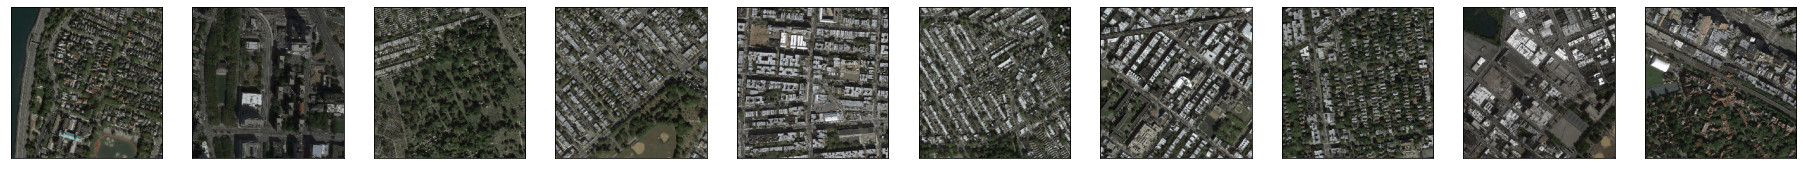

In [33]:
plot_images(images=test_domain_a_images, color=True)

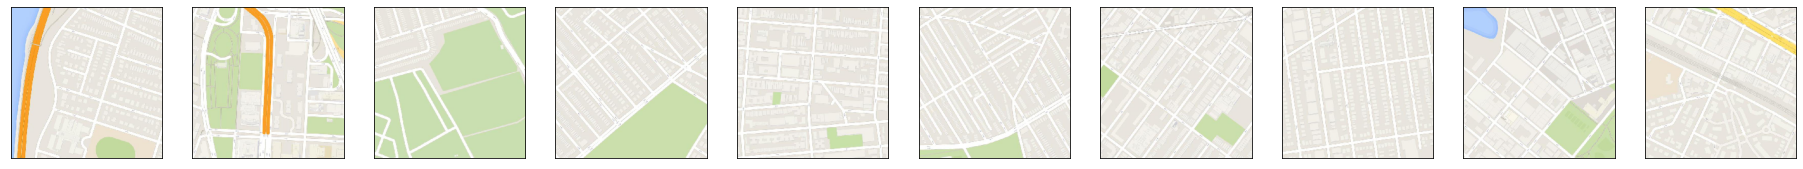

In [34]:
plot_images(images=test_domain_b_images, color=True)

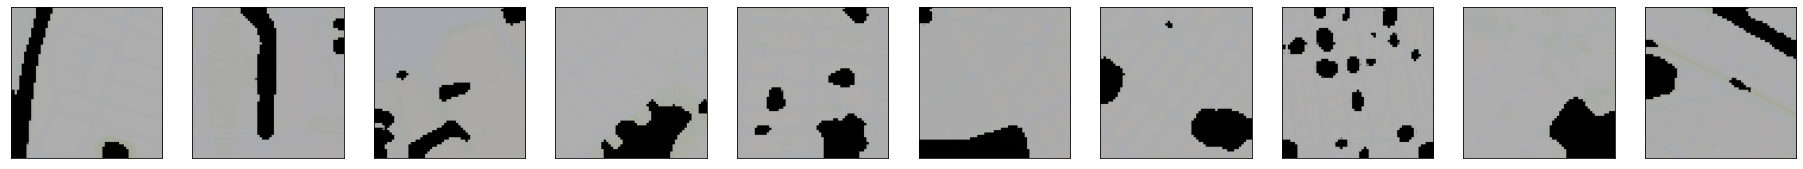

In [35]:
plot_images(images=domain_a_generated_images, color=True)

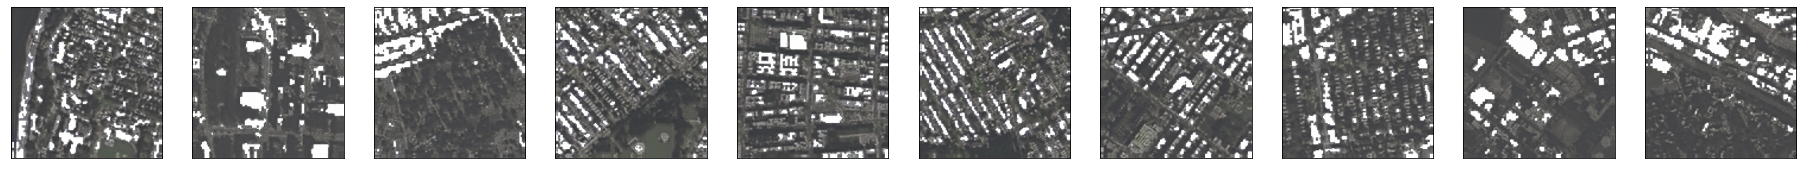

In [36]:
plot_images(images=domain_b_generated_images, color=True)